# Model Selection

In [1]:
pwd

'/Users/kelly/metis_v3/Project_3'

In [60]:
import pickle

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib inline

import seaborn as sns
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

In [80]:
with open('beer_final.pickle','rb') as read_file:
    beer_df = pickle.load(read_file)
beer_df.head()

,beerid,name,style,styleid,size,og,fg,abv,ibu,color,...,ipa,lager,stout,porter,saison,kolsch,ale,apa,wheat,pilsner
0,1,Vanilla Cream Ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,...,0,0,0,0,0,0,1,0,0,0
2,5,Bakke Brygg Belgisk Blonde 50 l,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.57,...,0,0,0,0,0,0,1,0,0,0
3,6,Sierra Nevada Pale Ale Clone,American Pale Ale,10,24.61,1.055,1.013,5.58,40.12,8.00,...,0,0,0,0,0,0,0,1,0,0
4,8,Spotted Clown (New Glarus Spotted Cow clone),Cream Ale,45,20.82,1.054,1.014,5.36,19.97,5.94,...,0,0,0,0,0,0,1,0,0,0
5,9,Chocolate Vanilla Porter,Robust Porter,129,22.71,1.060,1.016,5.77,31.63,34.76,...,0,0,0,1,0,0,0,0,0,0


In [147]:
beer_df.shape

(55933, 32)

In [81]:
beer_df_original = beer_df.copy()

In [65]:
beer_df_original.to_csv('beer_and_styles.csv', index = False, sep = ',')

In [5]:
#Check final df uploaded with 'Other' removed - Top 10 styles remain

beer_df.iloc[:,21:].sum()

ipa        16506
lager       4078
stout       5697
porter      2575
saison      2528
kolsch       840
ale        10791
apa         7328
wheat       4606
pilsner      984
dtype: int64

*Try Logistic Regression on one X and one Y to begin*

In [6]:
y_ipa = beer_df['ipa']

In [7]:
X_ipa = beer_df.iloc[:,4:-16].drop(columns = 'brewmethod')

In [8]:
X_ipa.head()

,size,og,fg,abv,ibu,color,boilsize,boiltime,boilgravity,efficiency
0,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75,1.038,70.0
2,50.00,1.060,1.010,6.48,17.84,4.57,60.00,90,1.050,72.0
3,24.61,1.055,1.013,5.58,40.12,8.00,29.34,70,1.047,79.0
4,20.82,1.054,1.014,5.36,19.97,5.94,28.39,75,1.040,70.0
5,22.71,1.060,1.016,5.77,31.63,34.76,30.28,75,1.042,73.0


In [9]:
X_ipa.columns

Index(['size', 'og', 'fg', 'abv', 'ibu', 'color', 'boilsize', 'boiltime',
       'boilgravity', 'efficiency'],
      dtype='object')

In [10]:
X_ipa.shape

(55933, 10)

In [11]:
std_scale = StandardScaler()

In [12]:
X_ipa_train, X_ipa_test, y_ipa_train, y_ipa_test = train_test_split(X_ipa, y_ipa, test_size = 0.3, random_state = 4444)

In [13]:
std_scale = StandardScaler()
X_ipa_train_scaled = std_scale.fit_transform(X_ipa_train)

In [14]:
ipa_log_model = LogisticRegression(C = 10)

In [15]:
ipa_log_model.fit(X_ipa_train_scaled, y_ipa_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
ipa_log_model.score(X_ipa_test, y_ipa_test)

0.3363528009535161

In [17]:
ipa_log_model.coef_, ipa_log_model.intercept_

(array([[ 0.0844909 ,  0.00323324, -0.0356024 ,  0.38945709,  2.08876665,
         -1.07999425, -0.03456343, -0.17608919,  0.03335394,  0.02483695]]),
 array([-1.17019637]))

In [18]:
ipa_log_model.predict(X_ipa_train).sum()

37199

In [19]:
ipa_log_model.predict(X_ipa_test).sum()

15903

In [20]:
X_inputs = X_ipa.values

In [21]:
ipa_pred = ipa_log_model.predict(X_ipa)

In [22]:
ipa_mask = y_ipa == 1

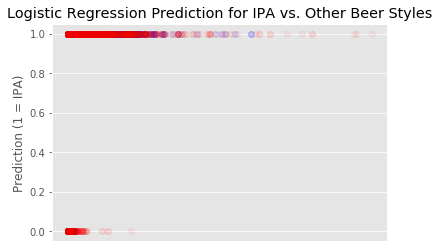

In [23]:
plt.plot(X_inputs[ipa_mask], ipa_pred[ipa_mask], 'bo', label='Actually IPA', alpha=0.1)
plt.plot(X_inputs[~ipa_mask], ipa_pred[~ipa_mask], 'ro', label='Not an IPA', alpha=0.05)
plt.xticks([])
plt.ylabel('Prediction (1 = IPA)')
plt.ylim(-0.05, 1.05)
plt.title('Logistic Regression Prediction for IPA vs. Other Beer Styles');

#plt.legend(loc='lower right');

Model Setup:

In [82]:
#Styles

beer_df.iloc[:,-10:].head()

,ipa,lager,stout,porter,saison,kolsch,ale,apa,wheat,pilsner
0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0,0
5,0,0,0,1,0,0,0,0,0,0


In [83]:
#Number Styles

beer_df['ipa'] = beer_df['ipa']*1
beer_df['lager'] = beer_df['lager']*2
beer_df['stout'] = beer_df['stout']*3
beer_df['porter'] = beer_df['porter']*4
beer_df['saison'] = beer_df['saison']*5
beer_df['kolsch'] = beer_df['kolsch']*6
beer_df['ale'] = beer_df['ale']*7
beer_df['apa'] = beer_df['apa']*8
beer_df['wheat'] = beer_df['wheat']*9
beer_df['pilsner'] = beer_df['pilsner']*10


In [84]:
beer_df.head()

,beerid,name,style,styleid,size,og,fg,abv,ibu,color,...,ipa,lager,stout,porter,saison,kolsch,ale,apa,wheat,pilsner
0,1,Vanilla Cream Ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,...,0,0,0,0,0,0,7,0,0,0
2,5,Bakke Brygg Belgisk Blonde 50 l,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.57,...,0,0,0,0,0,0,7,0,0,0
3,6,Sierra Nevada Pale Ale Clone,American Pale Ale,10,24.61,1.055,1.013,5.58,40.12,8.00,...,0,0,0,0,0,0,0,8,0,0
4,8,Spotted Clown (New Glarus Spotted Cow clone),Cream Ale,45,20.82,1.054,1.014,5.36,19.97,5.94,...,0,0,0,0,0,0,7,0,0,0
5,9,Chocolate Vanilla Porter,Robust Porter,129,22.71,1.060,1.016,5.77,31.63,34.76,...,0,0,0,4,0,0,0,0,0,0


In [85]:
style_list = ['ipa', 'lager', 'stout', 'porter', 'saison', 'kolsch', 'ale', 'apa', 'wheat', 'pilsner']

In [86]:
beer_df['style_num'] = beer_df.iloc[:,21:].sum(axis=1)

In [87]:
beer_df.head()

,beerid,name,style,styleid,size,og,fg,abv,ibu,color,...,lager,stout,porter,saison,kolsch,ale,apa,wheat,pilsner,style_num
0,1,Vanilla Cream Ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,...,0,0,0,0,0,7,0,0,0,7
2,5,Bakke Brygg Belgisk Blonde 50 l,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.57,...,0,0,0,0,0,7,0,0,0,7
3,6,Sierra Nevada Pale Ale Clone,American Pale Ale,10,24.61,1.055,1.013,5.58,40.12,8.00,...,0,0,0,0,0,0,8,0,0,8
4,8,Spotted Clown (New Glarus Spotted Cow clone),Cream Ale,45,20.82,1.054,1.014,5.36,19.97,5.94,...,0,0,0,0,0,7,0,0,0,7
5,9,Chocolate Vanilla Porter,Robust Porter,129,22.71,1.060,1.016,5.77,31.63,34.76,...,0,0,4,0,0,0,0,0,0,4


In [88]:
beer_df.columns

Index(['beerid', 'name', 'style', 'styleid', 'size', 'og', 'fg', 'abv', 'ibu',
       'color', 'boilsize', 'boiltime', 'boilgravity', 'efficiency',
       'brewmethod', 'allgrain', 'biab', 'partialmash', 'extract', 'style',
       'styleid', 'ipa', 'lager', 'stout', 'porter', 'saison', 'kolsch', 'ale',
       'apa', 'wheat', 'pilsner', 'style_num'],
      dtype='object')

In [89]:
beer_df.iloc[:,4:-13].head(1)

,size,og,fg,abv,ibu,color,boilsize,boiltime,boilgravity,efficiency,brewmethod,allgrain,biab,partialmash,extract
0,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75,1.038,70.0,All Grain,1,0,0,0


In [90]:
X = beer_df.iloc[:,4:-13].drop(columns = 'brewmethod')

In [91]:
y = beer_df.style_num

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4444)

In [35]:
'''
Did not end up using this code:

std_scale = StandardScaler()
X_train_scaled = std_scale.fit_transform(X_train)
X_test_scaled = std_scale.fit_transform(X_test)

'''

'\nDid not end up using this code:\n\nstd_scale = StandardScaler()\nX_train_scaled = std_scale.fit_transform(X_train)\nX_test_scaled = std_scale.fit_transform(X_test)\n\n'

In [36]:
#Create individual y variables to test models on individual styles

y_ipa = beer_df_original['ipa']
y_lager = beer_df_original['lager']
y_stout = beer_df_original['stout']
y_porter = beer_df_original['porter']
y_saison = beer_df_original['saison']
y_kolsch = beer_df_original['kolsch']
y_ale = beer_df_original['ale']
y_apa = beer_df_original['apa']
y_wheat = beer_df_original['wheat']
y_pilsner = beer_df_original['pilsner']

In [37]:
#Create train / test split for each

X_train_ipa, X_test_ipa, y_train_ipa, y_test_ipa = train_test_split(X, y_ipa, test_size = 0.3, random_state = 4444)
X_train_lager, X_test_lager, y_train_lager, y_test_lager = train_test_split(X, y_lager, test_size = 0.3, random_state = 4444)
X_train_stout, X_test_stout, y_train_stout, y_test_stout = train_test_split(X, y_stout, test_size = 0.3, random_state = 4444)
X_train_porter, X_test_porter, y_train_porter, y_test_porter = train_test_split(X, y_porter, test_size = 0.3, random_state = 4444)
X_train_saison, X_test_saison, y_train_saison, y_test_saison = train_test_split(X, y_saison, test_size = 0.3, random_state = 4444)
X_train_kolsch, X_test_kolsch, y_train_kolsch, y_test_kolsch = train_test_split(X, y_kolsch, test_size = 0.3, random_state = 4444)
X_train_ale, X_test_ale, y_train_ale, y_test_ale = train_test_split(X, y_ale, test_size = 0.3, random_state = 4444)
X_train_apa, X_test_apa, y_train_apa, y_test_apa = train_test_split(X, y_apa, test_size = 0.3, random_state = 4444)
X_train_wheat, X_test_wheat, y_train_wheat, y_test_wheat = train_test_split(X, y_wheat, test_size = 0.3, random_state = 4444)
X_train_pilsner, X_test_pilsner, y_train_pilsner, y_test_pilsner = train_test_split(X, y_pilsner, test_size = 0.3, random_state = 4444)


In [93]:
beer_df.head(1)

,beerid,name,style,styleid,size,og,fg,abv,ibu,color,...,lager,stout,porter,saison,kolsch,ale,apa,wheat,pilsner,style_num
0,1,Vanilla Cream Ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,...,0,0,0,0,0,7,0,0,0,7


In [94]:
with open ('beer_df_formodel.pickle', 'wb') as to_write:
    pickle.dump(beer_df, to_write)

In [145]:
beer_df.head(1)

,beerid,name,style,styleid,size,og,fg,abv,ibu,color,...,lager,stout,porter,saison,kolsch,ale,apa,wheat,pilsner,style_num
0,1,Vanilla Cream Ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,...,0,0,0,0,0,7,0,0,0,7


In [146]:
beer_df.to_csv('beer_data_formodel.csv', index = False, sep = ',')

**Logistic Regression Model**

Overall

In [118]:
log_model = LogisticRegression(C = 10)

In [119]:
log_model.fit(X_train, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [120]:
log_model.score(X_train, y_train)

0.5222588307409394

In [121]:
log_pred = log_model.predict_proba(X_test)

In [122]:
log_model.score(X_test, y_test)

0.5283075089392133

IPA

In [37]:
log_model_ipa = LogisticRegression(C = 10)
log_model_ipa.fit(X_train_ipa, y_train_ipa)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
log_model_ipa.score(X_train_ipa, y_train_ipa)

0.8404464536561694

In [39]:
log_model_ipa.score(X_test_ipa, y_test_ipa)

0.8382598331346841

In [40]:
log_model_ipa_pred = log_model_ipa.predict(X_test_ipa)

In [41]:
roc_auc_score(y_test_ipa, log_model_ipa_pred)

0.7722715647865014

In [42]:
print('F1:',metrics.f1_score(y_test_ipa, log_model_ipa_pred))
print('Accuracy:', metrics.accuracy_score(y_test_ipa, log_model_ipa_pred))
print('Precision:', metrics.precision_score(y_test_ipa, log_model_ipa_pred))
print('Recall:', metrics.recall_score(y_test_ipa, log_model_ipa_pred))

F1: 0.6921506352087116
Accuracy: 0.8382598331346841
Precision: 0.8031060805475125
Recall: 0.6081323500099661


Lager

In [58]:
log_model_lager = LogisticRegression(C = 10)
log_model_lager.fit(X_train_lager, y_train_lager)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [59]:
log_model_lager.score(X_train_lager, y_train_lager)

0.9266467448215974

In [60]:
log_model_lager.score(X_test_lager, y_test_lager)

0.9281287246722288

In [61]:
log_model_lager_pred = log_model_lager.predict(X_test_lager)

In [63]:
roc_auc_score(y_test_lager, log_model_lager_pred)

0.5

In [64]:
print('F1:',metrics.f1_score(y_test_lager, log_model_lager_pred))
print('Accuracy:', metrics.accuracy_score(y_test_lager, log_model_lager_pred))
print('Precision:', metrics.precision_score(y_test_lager, log_model_lager_pred))
print('Recall:', metrics.recall_score(y_test_lager, log_model_lager_pred))

F1: 0.0
Accuracy: 0.9281287246722288
Precision: 0.0
Recall: 0.0


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Stout

In [68]:
log_model_stout = LogisticRegression(C = 10)
log_model_stout.fit(X_train_stout, y_train_stout)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [69]:
log_model_stout.score(X_train_stout, y_train_stout)

0.942660843358108

In [70]:
log_model_stout.score(X_test_stout, y_test_stout)

0.9410011918951132

In [71]:
log_model_stout_pred = log_model_stout.predict(X_test_stout)

In [72]:
roc_auc_score(y_test_stout, log_model_stout_pred)

0.8355407280676742

In [73]:
print('F1:',metrics.f1_score(y_test_stout, log_model_stout_pred))
print('Accuracy:', metrics.accuracy_score(y_test_stout, log_model_stout_pred))
print('Precision:', metrics.precision_score(y_test_stout, log_model_stout_pred))
print('Recall:', metrics.recall_score(y_test_stout, log_model_stout_pred))

F1: 0.7128770301624131
Accuracy: 0.9410011918951132
Precision: 0.7237926972909305
Recall: 0.7022857142857143


Porter

In [74]:
log_model_porter = LogisticRegression(C = 10)
log_model_porter.fit(X_train_porter, y_train_porter)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [75]:
log_model_porter.score(X_train_porter, y_train_porter)

0.9494802441703062

In [76]:
log_model_porter.score(X_test_porter, y_test_porter)

0.9497020262216925

In [77]:
log_model_porter_pred = log_model_porter.predict(X_test_porter)

In [78]:
roc_auc_score(y_test_porter, log_model_porter_pred)

0.5093291686888055

ROC AUC Score =  0.5093291686888055


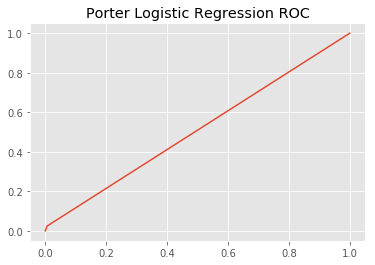

In [79]:
porter_log_fpr, porter_log_tpr, porter_thresholds = roc_curve(y_test_porter, log_model_porter_pred)

plt.plot(porter_log_fpr, porter_log_tpr);
plt.title('Porter Logistic Regression ROC')

print('ROC AUC Score = ', roc_auc_score(y_test_porter, log_model_porter_pred))

In [80]:
print('F1:',metrics.f1_score(y_test_porter, log_model_porter_pred))
print('Accuracy:', metrics.accuracy_score(y_test_porter, log_model_porter_pred))
print('Precision:', metrics.precision_score(y_test_porter, log_model_porter_pred))
print('Recall:', metrics.recall_score(y_test_porter, log_model_porter_pred))

F1: 0.043083900226757364
Accuracy: 0.9497020262216925
Precision: 0.15966386554621848
Recall: 0.02490170380078637


Saison

In [116]:
log_model_saison = LogisticRegression(C = 10)
log_model_saison.fit(X_train_saison, y_train_saison)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [117]:
print('Train Accuracy:',log_model_saison.score(X_train_saison, y_train_saison), 'Test Accuracy: ',log_model_saison.score(X_test_saison, y_test_saison))

Train Accuracy: 0.9540775930324624 Test Accuracy:  0.9552443384982121


In [118]:
log_model_saison_pred = log_model_saison.predict(X_test_saison)
roc_auc_score(y_test_saison, log_model_saison_pred)

0.49987525728185617

In [119]:
print('F1:',metrics.f1_score(y_test_saison, log_model_saison_pred))
print('Accuracy:', metrics.accuracy_score(y_test_saison, log_model_saison_pred))
print('Precision:', metrics.precision_score(y_test_saison, log_model_saison_pred))
print('Recall:', metrics.recall_score(y_test_saison, log_model_saison_pred))

F1: 0.0
Accuracy: 0.9552443384982121
Precision: 0.0
Recall: 0.0


Kolsch

In [85]:
log_model_kolsch = LogisticRegression(C = 10)
log_model_kolsch.fit(X_train_kolsch, y_train_kolsch)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [86]:
print('Train Accuracy:',log_model_kolsch.score(X_train_kolsch, y_train_kolsch), 'Test Accuracy: ',log_model_kolsch.score(X_test_kolsch, y_test_kolsch))

Train Accuracy: 0.9847265854468368 Test Accuracy:  0.98492252681764


In [87]:
log_model_kolsch_pred = log_model_kolsch.predict(X_test_kolsch)
roc_auc_score(y_test_kolsch, log_model_kolsch_pred)

0.4998487781272683

In [88]:
print('F1:',metrics.f1_score(y_test_kolsch, log_model_kolsch_pred))
print('Accuracy:', metrics.accuracy_score(y_test_kolsch, log_model_kolsch_pred))
print('Precision:', metrics.precision_score(y_test_kolsch, log_model_kolsch_pred))
print('Recall:', metrics.recall_score(y_test_kolsch, log_model_kolsch_pred))

F1: 0.0
Accuracy: 0.98492252681764
Precision: 0.0
Recall: 0.0


Ale

In [89]:
log_model_ale = LogisticRegression(C = 10)
log_model_ale.fit(X_train_ale, y_train_ale)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [90]:
print('Train Accuracy:',log_model_ale.score(X_train_ale, y_train_ale), 'Test Accuracy: ',log_model_ale.score(X_test_ale, y_test_ale))

Train Accuracy: 0.8064771537302378 Test Accuracy:  0.8045292014302742


In [91]:
log_model_ale_pred = log_model_ale.predict(X_test_ale)
roc_auc_score(y_test_ale, log_model_ale_pred)

0.4994624625835806

In [92]:
print('F1:',metrics.f1_score(y_test_ale, log_model_ale_pred))
print('Accuracy:', metrics.accuracy_score(y_test_ale, log_model_ale_pred))
print('Precision:', metrics.precision_score(y_test_ale, log_model_ale_pred))
print('Recall:', metrics.recall_score(y_test_ale, log_model_ale_pred))

F1: 0.0018259281801582471
Accuracy: 0.8045292014302742
Precision: 0.1
Recall: 0.0009213759213759214


APA

In [93]:
log_model_apa = LogisticRegression(C = 10)
log_model_apa.fit(X_train_apa, y_train_apa)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [94]:
print('Train Accuracy:',log_model_apa.score(X_train_apa, y_train_apa), 'Test Accuracy: ',log_model_apa.score(X_test_apa, y_test_apa))

Train Accuracy: 0.8652721375118126 Test Accuracy:  0.8678188319427891


In [95]:
log_model_apa_pred = log_model_apa.predict(X_test_apa)
roc_auc_score(y_test_apa, log_model_apa_pred)

0.4984396454280445

In [96]:
print('F1:',metrics.f1_score(y_test_apa, log_model_apa_pred))
print('Accuracy:', metrics.accuracy_score(y_test_apa, log_model_apa_pred))
print('Precision:', metrics.precision_score(y_test_apa, log_model_apa_pred))
print('Recall:', metrics.recall_score(y_test_apa, log_model_apa_pred))

F1: 0.0026978417266187047
Accuracy: 0.8678188319427891
Precision: 0.043478260869565216
Recall: 0.0013921113689095127


Wheat

In [97]:
log_model_wheat = LogisticRegression(C = 10)
log_model_wheat.fit(X_train_wheat, y_train_wheat)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [98]:
print('Train Accuracy:',log_model_wheat.score(X_train_wheat, y_train_wheat), 'Test Accuracy: ',log_model_wheat.score(X_test_wheat, y_test_wheat))

Train Accuracy: 0.9101473705718591 Test Accuracy:  0.9122765196662693


In [99]:
log_model_wheat_pred = log_model_wheat.predict(X_test_wheat)
roc_auc_score(y_test_wheat, log_model_wheat_pred)

0.5325403277072227

In [100]:
print('F1:',metrics.f1_score(y_test_wheat, log_model_wheat_pred))
print('Accuracy:', metrics.accuracy_score(y_test_wheat, log_model_wheat_pred))
print('Precision:', metrics.precision_score(y_test_wheat, log_model_wheat_pred))
print('Recall:', metrics.recall_score(y_test_wheat, log_model_wheat_pred))

F1: 0.1279620853080569
Accuracy: 0.9122765196662693
Precision: 0.31671554252199413
Recall: 0.0801781737193764


Pilsner

In [101]:
log_model_pilsner = LogisticRegression(C = 10)
log_model_pilsner.fit(X_train_pilsner, y_train_pilsner)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [102]:
print('Train Accuracy:',log_model_saison.score(X_train_pilsner, y_train_pilsner), 'Test Accuracy: ',log_model_pilsner.score(X_test_pilsner, y_test_pilsner))

Train Accuracy: 0.9818660128214952 Test Accuracy:  0.9824791418355184


In [103]:
log_model_pilsner_pred = log_model_pilsner.predict(X_test_pilsner)
roc_auc_score(y_test_pilsner, log_model_pilsner_pred)

0.4999090302625993

In [104]:
print('F1:',metrics.f1_score(y_test_pilsner, log_model_pilsner_pred))
print('Accuracy:', metrics.accuracy_score(y_test_pilsner, log_model_pilsner_pred))
print('Precision:', metrics.precision_score(y_test_pilsner, log_model_pilsner_pred))
print('Recall:', metrics.recall_score(y_test_pilsner, log_model_pilsner_pred))

F1: 0.0
Accuracy: 0.9824791418355184
Precision: 0.0
Recall: 0.0


**K-Nearest Neighbor**

In [105]:
k_range = list(range(1,15))
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring = 'accuracy')
    k_scores.append(scores.mean())
    
print(k_scores)

[0.47324683254864724, 0.4772285236074678, 0.5042514803600084, 0.5221307076418574, 0.5294365556788329, 0.5357199793742055, 0.5393200670475176, 0.5435837913964414, 0.5481298346009484, 0.549533781343368, 0.5529053857193303, 0.5533399781903399, 0.5556123681254055, 0.5576055018331897]


In [106]:
knn_model = KNeighborsClassifier(n_neighbors = 15) #selected 15 neighobrs from above

knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

In [107]:
knn_pred = knn_model.predict(X_test)

In [108]:
knn_model.score(X_test, y_test)

0.5638855780691299

In [109]:
metrics.accuracy_score(y_test, knn_pred)

0.5638855780691299

In [1225]:
knn_confusion = confusion_matrix(y_test, knn_pred)

Text(0.5,1,'KNN Confusion Matrix')

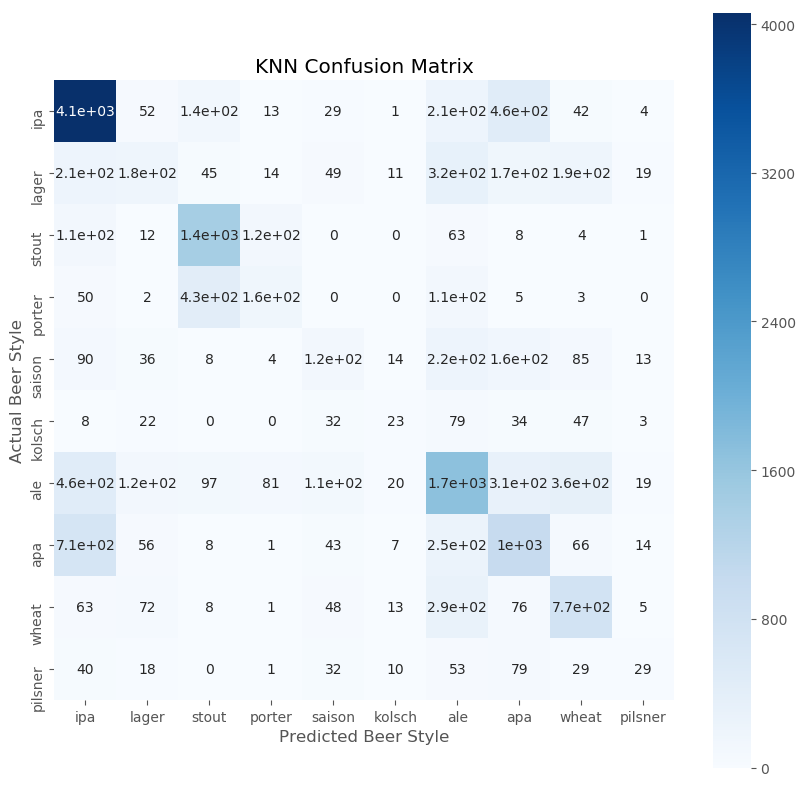

In [1226]:
plt.figure(figsize = (10,10),dpi = 100)
sns.heatmap(knn_confusion, cmap= plt.cm.Blues, annot = True, square = True, xticklabels = style_list, yticklabels = style_list)

plt.xlabel('Predicted Beer Style')
plt.ylabel('Actual Beer Style')
plt.title("KNN Confusion Matrix")

In [630]:
k_range = (10,100)

grid_param = dict(n_neighbors = k_range)
grid = GridSearchCV(knn, grid_param, cv = 10, scoring = 'accuracy')

In [631]:
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=14, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': (10, 100)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [632]:
grid.grid_scores_

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.55543, std: 0.00911, params: {'n_neighbors': 10},
 mean: 0.56870, std: 0.01061, params: {'n_neighbors': 100}]

In [633]:
grid.best_score_

0.5686982639944219

In [634]:
grid.best_params_

{'n_neighbors': 100}

In [635]:
grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=100, p=2,
           weights='uniform')

In [123]:
print("KNN Accuracy:",knn_model.score(X_test, y_test),'\n'
      "Logistic Regression Accuracy:",log_model.score(X_test, y_test))

KNN Accuracy: 0.5638855780691299 
Logistic Regression Accuracy: 0.5283075089392133


IPA

In [124]:
#Input styles here:

y_test_style = y_test_ipa
X_test_style = X_test_ipa

y_train_style = y_train_ipa
X_train_style = X_train_ipa

In [125]:
knn_model_ipa = KNeighborsClassifier(n_neighbors = 15)
knn_model_ipa.fit(X_train_style, y_train_style)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

In [126]:
print('Train Accuracy:',knn_model_ipa.score(X_train_style, y_train_style), 'Test Accuracy: ',knn_model_ipa.score(X_test_style, y_test_style))

Train Accuracy: 0.8669833729216152 Test Accuracy:  0.8530393325387365


In [127]:
knn_model_ipa_pred = knn_model_ipa.predict(X_test_style)
roc_auc_score(y_test_style, knn_model_ipa_pred)

0.8204210758656477

In [128]:
if roc_auc_score(y_test_style, knn_model_ipa_pred)>roc_auc_score(y_test_style, log_model_ipa_pred):
    print("KNN ROC Score better than Logistic Regression")
else:
    print("Logistic Regression ROC Score better than KNN")

KNN ROC Score better than Logistic Regression


In [129]:
print('F1:',metrics.f1_score(y_test_style, knn_model_ipa_pred))
print('Accuracy:', metrics.accuracy_score(y_test_style, knn_model_ipa_pred))
print('Precision:', metrics.precision_score(y_test_style, knn_model_ipa_pred))
print('Recall:', metrics.recall_score(y_test_style, knn_model_ipa_pred))

F1: 0.7505058680696075
Accuracy: 0.8530393325387365
Precision: 0.7620710910211629
Recall: 0.7392864261510863


Lager

In [130]:
#Input styles here:

y_test_style = y_test_lager
X_test_style = X_test_lager

y_train_style = y_train_lager
X_train_style = X_train_lager

In [131]:
knn_model_lager = KNeighborsClassifier(n_neighbors = 15)
knn_model_lager.fit(X_train_style, y_train_style)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

In [132]:
print('Train Accuracy:',knn_model_lager.score(X_train_style, y_train_style), 'Test Accuracy: ',knn_model_lager.score(X_test_style, y_test_style))

Train Accuracy: 0.9287410926365796 Test Accuracy:  0.9286054827175209


In [133]:
knn_model_lager_pred = knn_model_lager.predict(X_test_style)
roc_auc_score(y_test_style, knn_model_lager_pred)

0.5197637726354744

In [134]:
if roc_auc_score(y_test_style, knn_model_lager_pred)>roc_auc_score(y_test_style, log_model_lager_pred):
    print("KNN ROC Score better than Logistic Regression")
else:
    print("Logistic Regression ROC Score better than KNN")

KNN ROC Score better than Logistic Regression


In [135]:
print('F1:',metrics.f1_score(y_test_style, knn_model_lager_pred))
print('Accuracy:', metrics.accuracy_score(y_test_style, knn_model_lager_pred))
print('Precision:', metrics.precision_score(y_test_style, knn_model_lager_pred))
print('Recall:', metrics.recall_score(y_test_style, knn_model_lager_pred))

F1: 0.07846153846153847
Accuracy: 0.9286054827175209
Precision: 0.5425531914893617
Recall: 0.04228855721393035


Stout

In [136]:
#Input styles here:

y_test_style = y_test_stout
X_test_style = X_test_stout

y_train_style = y_train_stout
X_train_style = X_train_stout

In [137]:
knn_model_stout = KNeighborsClassifier(n_neighbors = 15)
knn_model_stout.fit(X_train_style, y_train_style)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

In [138]:
print('Train Accuracy:',knn_model_stout.score(X_train_style, y_train_style), 'Test Accuracy: ',knn_model_stout.score(X_test_style, y_test_style))

Train Accuracy: 0.9459045283886293 Test Accuracy:  0.9389749702026222


In [139]:
knn_model_stout_pred = knn_model_stout.predict(X_test_style)
roc_auc_score(y_test_style, knn_model_stout_pred)

0.8440026613439787

In [140]:
if roc_auc_score(y_test_style, knn_model_stout_pred)>roc_auc_score(y_test_style, log_model_stout_pred):
    print("KNN ROC Score better than Logistic Regression")
else:
    print("Logistic Regression ROC Score better than KNN")

KNN ROC Score better than Logistic Regression


In [141]:
print('F1:',metrics.f1_score(y_test_style, knn_model_stout_pred))
print('Accuracy:', metrics.accuracy_score(y_test_style, knn_model_stout_pred))
print('Precision:', metrics.precision_score(y_test_style, knn_model_stout_pred))
print('Recall:', metrics.recall_score(y_test_style, knn_model_stout_pred))

F1: 0.7121978639685216
Accuracy: 0.9389749702026222
Precision: 0.7007743362831859
Recall: 0.724


Porter

In [142]:
#Input styles here:

y_test_style = y_test_porter
X_test_style = X_test_porter

y_train_style = y_train_porter
X_train_style = X_train_porter

In [143]:
knn_model_porter = KNeighborsClassifier(n_neighbors = 15)
knn_model_porter.fit(X_train_style, y_train_style)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

In [144]:
print('Train Accuracy:',knn_model_porter.score(X_train_style, y_train_style), 'Test Accuracy: ',knn_model_porter.score(X_test_style, y_test_style))

Train Accuracy: 0.9564784307715883 Test Accuracy:  0.9533969010727056


In [145]:
knn_model_porter_pred = knn_model_porter.predict(X_test_style)
roc_auc_score(y_test_style, knn_model_porter_pred)

0.551206446689056

In [146]:
if roc_auc_score(y_test_style, knn_model_porter_pred)>roc_auc_score(y_test_style, log_model_porter_pred):
    print("KNN ROC Score better than Logistic Regression")
else:
    print("Logistic Regression ROC Score better than KNN")

KNN ROC Score better than Logistic Regression


In [147]:
print('F1:',metrics.f1_score(y_test_style, knn_model_porter_pred))
print('Accuracy:', metrics.accuracy_score(y_test_style, knn_model_porter_pred))
print('Precision:', metrics.precision_score(y_test_style, knn_model_porter_pred))
print('Recall:', metrics.recall_score(y_test_style, knn_model_porter_pred))

F1: 0.1751054852320675
Accuracy: 0.9533969010727056
Precision: 0.4486486486486487
Recall: 0.10878112712975098


Saison

In [120]:
#Input styles here:

y_test_style = y_test_saison
X_test_style = X_test_saison

y_train_style = y_train_saison
X_train_style = X_train_saison

In [121]:
knn_model_saison = KNeighborsClassifier(n_neighbors = 15)
knn_model_saison.fit(X_train_style, y_train_style)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

In [122]:
print('Train Accuracy:',knn_model_saison.score(X_train_style, y_train_style), 'Test Accuracy: ',knn_model_saison.score(X_test_style, y_test_style))

Train Accuracy: 0.95443516461063 Test Accuracy:  0.9554231227651967


In [123]:
knn_model_saison_pred = knn_model_saison.predict(X_test_style)
roc_auc_score(y_test_style, knn_model_saison_pred)

0.5044359228635784

In [124]:
if roc_auc_score(y_test_style, knn_model_saison_pred)>roc_auc_score(y_test_style, log_model_saison_pred):
    print("KNN ROC Score better than Logistic Regression")
else:
    print("Logistic Regression ROC Score better than KNN")

KNN ROC Score better than Logistic Regression


In [125]:
print('F1:',metrics.f1_score(y_test_style, knn_model_saison_pred))
print('Accuracy:', metrics.accuracy_score(y_test_style, knn_model_saison_pred))
print('Precision:', metrics.precision_score(y_test_style, knn_model_saison_pred))
print('Recall:', metrics.recall_score(y_test_style, knn_model_saison_pred))

F1: 0.01837270341207349
Accuracy: 0.9554231227651967
Precision: 0.4666666666666667
Recall: 0.009370816599732263


Kolsch

In [154]:
#Input styles here:

y_test_style = y_test_kolsch
X_test_style = X_test_kolsch

y_train_style = y_train_kolsch
X_train_style = X_train_kolsch

In [155]:
knn_model_kolsch = KNeighborsClassifier(n_neighbors = 15)
knn_model_kolsch.fit(X_train_style, y_train_style)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

In [156]:
print('Train Accuracy:',knn_model_kolsch.score(X_train_style, y_train_style), 'Test Accuracy: ',knn_model_kolsch.score(X_test_style, y_test_style))

Train Accuracy: 0.9848542895818967 Test Accuracy:  0.9852205005959476


In [157]:
knn_model_kolsch_pred = knn_model_kolsch.predict(X_test_style)
roc_auc_score(y_test_style, knn_model_kolsch_pred)

0.5019858846577118

In [158]:
if roc_auc_score(y_test_style, knn_model_kolsch_pred)>roc_auc_score(y_test_style, log_model_kolsch_pred):
    print("KNN ROC Score better than Logistic Regression")
else:
    print("Logistic Regression ROC Score better than KNN") 

KNN ROC Score better than Logistic Regression


In [159]:
print('F1:',metrics.f1_score(y_test_style, knn_model_kolsch_pred))
print('Accuracy:', metrics.accuracy_score(y_test_style, knn_model_kolsch_pred))
print('Precision:', metrics.precision_score(y_test_style, knn_model_kolsch_pred))
print('Recall:', metrics.recall_score(y_test_style, knn_model_kolsch_pred))

F1: 0.008
Accuracy: 0.9852205005959476
Precision: 0.5
Recall: 0.004032258064516129


Ale

In [160]:
#Input styles here:

y_test_style = y_test_ale
X_test_style = X_test_ale

y_train_style = y_train_ale
X_train_style = X_train_ale

In [161]:
knn_model_ale = KNeighborsClassifier(n_neighbors = 15)
knn_model_ale.fit(X_train_style, y_train_style)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

In [162]:
print('Train Accuracy:',knn_model_ale.score(X_train_style, y_train_style), 'Test Accuracy: ',knn_model_ale.score(X_test_style, y_test_style))

Train Accuracy: 0.8533956529512425 Test Accuracy:  0.8395113230035757


In [163]:
knn_model_ale_pred = knn_model_ale.predict(X_test_style)
roc_auc_score(y_test_style, knn_model_ale_pred)

0.6463837244116747

In [164]:
if roc_auc_score(y_test_style, knn_model_ale_pred)>roc_auc_score(y_test_style, log_model_ale_pred):
    print("KNN ROC Score better than Logistic Regression")
else:
    print("Logistic Regression ROC Score better than KNN")

KNN ROC Score better than Logistic Regression


In [165]:
print('F1:',metrics.f1_score(y_test_style, knn_model_ale_pred))
print('Accuracy:', metrics.accuracy_score(y_test_style, knn_model_ale_pred))
print('Precision:', metrics.precision_score(y_test_style, knn_model_ale_pred))
print('Recall:', metrics.recall_score(y_test_style, knn_model_ale_pred))

F1: 0.4443985970703528
Accuracy: 0.8395113230035757
Precision: 0.6769327467001885
Recall: 0.3307739557739558


APA

In [166]:
#Input styles here:

y_test_style = y_test_apa
X_test_style = X_test_apa

y_train_style = y_train_apa
X_train_style = X_train_apa

In [167]:
knn_model_apa = KNeighborsClassifier(n_neighbors = 15)
knn_model_apa.fit(X_train_style, y_train_style)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

In [168]:
print('Train Accuracy:',knn_model_apa.score(X_train_style, y_train_style), 'Test Accuracy: ',knn_model_apa.score(X_test_style, y_test_style))

Train Accuracy: 0.8842745128087247 Test Accuracy:  0.8751489868891538


In [169]:
knn_model_apa_pred = knn_model_apa.predict(X_test_style)
roc_auc_score(y_test_style, knn_model_apa_pred)

0.611847224701053

In [170]:
if roc_auc_score(y_test_style, knn_model_apa_pred)>roc_auc_score(y_test_style, log_model_apa_pred):
    print("KNN ROC Score better than Logistic Regression")
else:
    print("Logistic Regression ROC Score better than KNN")

KNN ROC Score better than Logistic Regression


In [171]:
print('F1:',metrics.f1_score(y_test_style, knn_model_apa_pred))
print('Accuracy:', metrics.accuracy_score(y_test_style, knn_model_apa_pred))
print('Precision:', metrics.precision_score(y_test_style, knn_model_apa_pred))
print('Recall:', metrics.recall_score(y_test_style, knn_model_apa_pred))

F1: 0.3463338533541342
Accuracy: 0.8751489868891538
Precision: 0.5285714285714286
Recall: 0.25754060324825984


Wheat

In [172]:
#Input styles here:

y_test_style = y_test_wheat
X_test_style = X_test_wheat

y_train_style = y_train_wheat
X_train_style = X_train_wheat

In [173]:
knn_model_wheat = KNeighborsClassifier(n_neighbors = 15)
knn_model_wheat.fit(X_train_style, y_train_style)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

In [174]:
print('Train Accuracy:',knn_model_wheat.score(X_train_style, y_train_style), 'Test Accuracy: ',knn_model_wheat.score(X_test_style, y_test_style))

Train Accuracy: 0.935381707659694 Test Accuracy:  0.9302741358760429


In [175]:
knn_model_wheat_pred = knn_model_wheat.predict(X_test_style)
roc_auc_score(y_test_style, knn_model_wheat_pred)

0.6863133411271588

In [176]:
if roc_auc_score(y_test_style, knn_model_wheat_pred)>roc_auc_score(y_test_style, log_model_wheat_pred):
    print("KNN ROC Score better than Logistic Regression")
else:
    print("Logistic Regression ROC Score better than KNN")

KNN ROC Score better than Logistic Regression


In [177]:
print('F1:',metrics.f1_score(y_test_style, knn_model_wheat_pred))
print('Accuracy:', metrics.accuracy_score(y_test_style, knn_model_wheat_pred))
print('Precision:', metrics.precision_score(y_test_style, knn_model_wheat_pred))
print('Recall:', metrics.recall_score(y_test_style, knn_model_wheat_pred))

F1: 0.47674418604651164
Accuracy: 0.9302741358760429
Precision: 0.5995500562429696
Recall: 0.3956941351150705


Pilsner

In [178]:
#Input styles here:

y_test_style = y_test_pilsner
X_test_style = X_test_pilsner

y_train_style = y_train_pilsner
X_train_style = X_train_pilsner

In [179]:
knn_model_pilsner = KNeighborsClassifier(n_neighbors = 15)
knn_model_pilsner.fit(X_train_style, y_train_style)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

In [180]:
print('Train Accuracy:',knn_model_pilsner.score(X_train_style, y_train_style), 'Test Accuracy: ',knn_model_pilsner.score(X_test_style, y_test_style))

Train Accuracy: 0.9824789926697827 Test Accuracy:  0.982657926102503


In [181]:
knn_model_pilsner_pred = knn_model_pilsner.predict(X_test_style)
roc_auc_score(y_test_style, knn_model_pilsner_pred)

0.5067515592504761

In [182]:
if roc_auc_score(y_test_style, knn_model_pilsner_pred)>roc_auc_score(y_test_style, log_model_pilsner_pred):
    print("KNN ROC Score better than Logistic Regression")
else:
    print("Logistic Regression ROC Score better than KNN")

KNN ROC Score better than Logistic Regression


In [183]:
print('F1:',metrics.f1_score(y_test_style, knn_model_pilsner_pred))
print('Accuracy:', metrics.accuracy_score(y_test_style, knn_model_pilsner_pred))
print('Precision:', metrics.precision_score(y_test_style, knn_model_pilsner_pred))
print('Recall:', metrics.recall_score(y_test_style, knn_model_pilsner_pred))

F1: 0.026755852842809368
Accuracy: 0.982657926102503
Precision: 0.5
Recall: 0.013745704467353952


**Decision Trees**

In [41]:
dt_model = DecisionTreeClassifier(random_state = 4444)

In [42]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=4444,
            splitter='best')

In [43]:
dt_pred = dt_model.predict(X_test)

In [44]:
dt_model.score(X_test, y_test)

0.499761620977354

In [55]:
dt_tree = tree.export_graphviz(dt_model, out_file=None, 
                         feature_names= list(X.columns),  
                         class_names= ['ipa', 'lager', 'stout', 'porter', 'saison', 'kolsch', 'ale', 'apa', 'wheat', 'pilsner'],  
                         filled=True, rounded=True,  
                         special_characters=False)  
dt_graph = graphviz.Source(dt_tree) 
dt_graph.view()

'Source.gv.pdf'

In [188]:
if dt_model.score(X_test, y_test)>knn_model.score(X_test, y_test):
    print("Overall Decision Tree Accuracy better than KNN - check individual styles")
else:
    print("Overall KNN Accuracy better than Decision Tree, move on to next model")

Overall KNN Accuracy better than Decision Tree, move on to next model


**Random Forest**

In [189]:
rf_model = RandomForestClassifier(random_state = 4444)

In [190]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=4444, verbose=0,
            warm_start=False)

In [191]:
rf_pred = rf_model.predict(X_test)

In [192]:
rf_model.score(X_test, y_test)

0.5909415971394517

In [193]:
metrics.accuracy_score(y_test, rf_pred)

0.5909415971394517

In [194]:
with open ('random_forest.pickle', 'wb') as to_write:
    pickle.dump(rf_model, to_write)

In [195]:
rf_confusion = confusion_matrix(y_test, rf_pred)

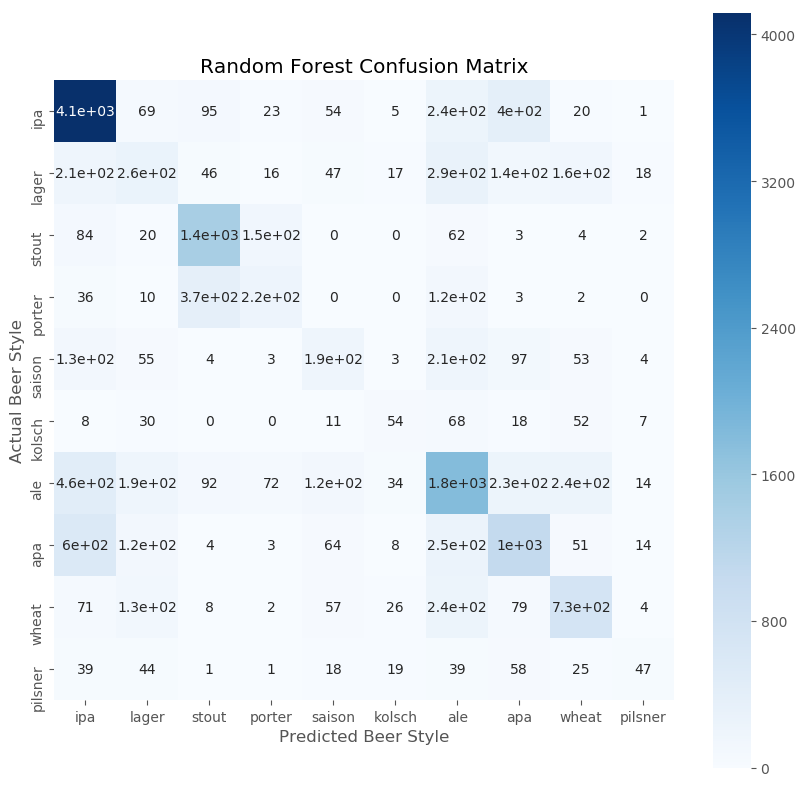

In [196]:
plt.figure(figsize = (10,10),dpi = 100)
sns.heatmap(rf_confusion, cmap= plt.cm.Blues, annot = True, square = True, xticklabels = style_list, yticklabels = style_list)

plt.xlabel('Predicted Beer Style');
plt.ylabel('Actual Beer Style');
plt.title("Random Forest Confusion Matrix");

In [347]:
rf_model.feature_importances_

array([0.06048888, 0.07199185, 0.06284205, 0.10837703, 0.22866008,
       0.23199263, 0.0642963 , 0.02092067, 0.07289059, 0.05145274,
       0.0096589 , 0.00826245, 0.00391087, 0.00425496])

In [197]:
if rf_model.score(X_test, y_test)>knn_model.score(X_test, y_test):
    print("Overall Random Forest Accuracy better than KNN - check individual styles")
else:
    print("Overall KNN Accuracy better than Random Forest, move on to next model")

Overall Random Forest Accuracy better than KNN - check individual styles


    IPA

In [198]:
rf_model_ipa = RandomForestClassifier(random_state = 4444)
rf_model_ipa.fit(X_train_ipa, y_train_ipa)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=4444, verbose=0,
            warm_start=False)

In [199]:
print('Train Accuracy:',rf_model_ipa.score(X_train_ipa, y_train_ipa), 'Test Accuracy: ',rf_model_ipa.score(X_test_ipa, y_test_ipa))

Train Accuracy: 0.9895538017521007 Test Accuracy:  0.8652562574493444


In [200]:
rf_model_ipa_pred = rf_model_ipa.predict(X_test_ipa)
roc_auc_score(y_test_ipa, rf_model_ipa_pred)

0.8200471961597676

In [201]:
if roc_auc_score(y_test_ipa, rf_model_ipa_pred)>roc_auc_score(y_test_ipa, knn_model_ipa_pred):
    print("Random Forest ROC Score better than KNN")
else:
    print("KNN ROC Score better than Random Forest")

KNN ROC Score better than Random Forest


In [202]:
print('F1:',metrics.f1_score(y_test_ipa, rf_model_ipa_pred))
print('Accuracy:', metrics.accuracy_score(y_test_ipa, rf_model_ipa_pred))
print('Precision:', metrics.precision_score(y_test_ipa, rf_model_ipa_pred))
print('Recall:', metrics.recall_score(y_test_ipa, rf_model_ipa_pred))

F1: 0.7584659758572802
Accuracy: 0.8652562574493444
Precision: 0.817219152854512
Recall: 0.7075941797887183


Lager

In [203]:
rf_model_lager = RandomForestClassifier(random_state = 4444)
rf_model_lager.fit(X_train_lager, y_train_lager)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=4444, verbose=0,
            warm_start=False)

In [204]:
print('Train Accuracy:',rf_model_lager.score(X_train_ipa, y_train_lager), 'Test Accuracy: ',rf_model_lager.score(X_test_lager, y_test_lager))

Train Accuracy: 0.9883789237095497 Test Accuracy:  0.9289034564958284


In [205]:
rf_model_lager_pred = rf_model_lager.predict(X_test_lager)
roc_auc_score(y_test_lager, rf_model_lager_pred)

0.5394312309008444

In [206]:
if roc_auc_score(y_test_lager, rf_model_lager_pred)>roc_auc_score(y_test_lager, knn_model_lager_pred):
    print("Random Forest ROC Score better than KNN")
else:
    print("KNN ROC Score better than Random Forest")

Random Forest ROC Score better than KNN


In [207]:
print('F1:',metrics.f1_score(y_test_lager, rf_model_lager_pred))
print('Accuracy:', metrics.accuracy_score(y_test_lager, rf_model_lager_pred))
print('Precision:', metrics.precision_score(y_test_lager, rf_model_lager_pred))
print('Recall:', metrics.recall_score(y_test_lager, rf_model_lager_pred))

F1: 0.1460272011453114
Accuracy: 0.9289034564958284
Precision: 0.5340314136125655
Recall: 0.0845771144278607


Stout

In [208]:
rf_model_stout = RandomForestClassifier(random_state = 4444)
rf_model_stout.fit(X_train_stout, y_train_stout)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=4444, verbose=0,
            warm_start=False)

In [209]:
print('Train Accuracy:',rf_model_stout.score(X_train_stout, y_train_stout), 'Test Accuracy: ',rf_model_stout.score(X_test_stout, y_test_stout))

Train Accuracy: 0.9961433351211912 Test Accuracy:  0.9441597139451728


In [210]:
rf_model_stout_pred = rf_model_stout.predict(X_test_stout)
roc_auc_score(y_test_stout, rf_model_stout_pred)

0.8292255489021957

In [211]:
if roc_auc_score(y_test_stout, rf_model_stout_pred)>roc_auc_score(y_test_stout, knn_model_stout_pred):
    print("Random Forest ROC Score better than KNN")
else:
    print("KNN ROC Score better than Random Forest")

KNN ROC Score better than Random Forest


In [212]:
print('F1:',metrics.f1_score(y_test_stout, rf_model_stout_pred))
print('Accuracy:', metrics.accuracy_score(y_test_stout, rf_model_stout_pred))
print('Precision:', metrics.precision_score(y_test_stout, rf_model_stout_pred))
print('Recall:', metrics.recall_score(y_test_stout, rf_model_stout_pred))

F1: 0.7187030921645152
Accuracy: 0.9441597139451728
Precision: 0.7571157495256167
Recall: 0.684


Porter

In [213]:
#Input test styles here:

y_test_style = y_test_porter
X_test_style = X_test_porter

y_train_style = y_train_porter
X_train_style = X_train_porter

In [214]:
#Create model here:
rf_model_porter = RandomForestClassifier(random_state = 4444)
rf_model_porter.fit(X_train_style, y_train_style)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=4444, verbose=0,
            warm_start=False)

In [215]:
print('Train Accuracy:',rf_model_porter.score(X_train_style, y_train_style), 'Test Accuracy: ',rf_model_porter.score(X_test_style, y_test_style))

Train Accuracy: 0.9955814369269277 Test Accuracy:  0.9542312276519667


In [216]:
rf_model_porter_pred = rf_model_porter.predict(X_test_style)
roc_auc_score(y_test_style, rf_model_porter_pred)

0.5691180348926448

In [217]:
if roc_auc_score(y_test_style, rf_model_porter_pred)>roc_auc_score(y_test_style, knn_model_porter_pred):
    print("Random Forest ROC Score better than KNN")
else:
    print("KNN ROC Score better than Random Forest")

Random Forest ROC Score better than KNN


In [218]:
print('F1:',metrics.f1_score(y_test_style, rf_model_porter_pred))
print('Accuracy:', metrics.accuracy_score(y_test_style, rf_model_porter_pred))
print('Precision:', metrics.precision_score(y_test_style, rf_model_porter_pred))
print('Recall:', metrics.recall_score(y_test_style, rf_model_porter_pred))

F1: 0.22424242424242427
Accuracy: 0.9542312276519667
Precision: 0.4889867841409692
Recall: 0.145478374836173


Saison

In [126]:
#Input styles here:

y_test_style = y_test_saison
X_test_style = X_test_saison

y_train_style = y_train_saison
X_train_style = X_train_saison

In [127]:
rf_model_saison = RandomForestClassifier(random_state = 4444)
rf_model_saison.fit(X_train_style, y_train_style)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=4444, verbose=0,
            warm_start=False)

In [128]:
print('Train Accuracy:',rf_model_saison.score(X_train_style, y_train_style), 'Test Accuracy: ',rf_model_saison.score(X_test_style, y_test_style))

Train Accuracy: 0.9925165376854903 Test Accuracy:  0.9579856972586412


In [129]:
rf_model_saison_pred = rf_model_saison.predict(X_test_style)
roc_auc_score(y_test_style, rf_model_saison_pred)

0.5555532594211855

In [130]:
if roc_auc_score(y_test_style, rf_model_saison_pred)>roc_auc_score(y_test_style, knn_model_saison_pred):
    print("Random Forest ROC Score better than KNN")
else:
    print("KNN ROC Score better than Random Forest")

Random Forest ROC Score better than KNN


In [131]:
print('F1:',metrics.f1_score(y_test_style, rf_model_saison_pred))
print('Accuracy:', metrics.accuracy_score(y_test_style, rf_model_saison_pred))
print('Precision:', metrics.precision_score(y_test_style, rf_model_saison_pred))
print('Recall:', metrics.recall_score(y_test_style, rf_model_saison_pred))

F1: 0.19428571428571428
Accuracy: 0.9579856972586412
Precision: 0.6640625
Recall: 0.11378848728246319


Kolsch

In [225]:
#Input styles here:

y_test_style = y_test_kolsch
X_test_style = X_test_kolsch

y_train_style = y_train_kolsch
X_train_style = X_train_kolsch

In [226]:
rf_model_kolsch = RandomForestClassifier(random_state = 4444)
rf_model_kolsch.fit(X_train_style, y_train_style)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=4444, verbose=0,
            warm_start=False)

In [227]:
print('Train Accuracy:',rf_model_kolsch.score(X_train_style, y_train_style), 'Test Accuracy: ',rf_model_kolsch.score(X_test_style, y_test_style))

Train Accuracy: 0.9973948356447782 Test Accuracy:  0.9858164481525625


In [228]:
rf_model_kolsch_pred = rf_model_kolsch.predict(X_test_style)
roc_auc_score(y_test_style, rf_model_kolsch_pred)

0.5439919062151214

In [229]:
if roc_auc_score(y_test_style, rf_model_kolsch_pred)>roc_auc_score(y_test_style, knn_model_kolsch_pred):
    print("Random Forest ROC Score better than KNN")
else:
    print("KNN ROC Score better than Random Forest")

Random Forest ROC Score better than KNN


In [230]:
print('F1:',metrics.f1_score(y_test_style, rf_model_kolsch_pred))
print('Accuracy:', metrics.accuracy_score(y_test_style, rf_model_kolsch_pred))
print('Precision:', metrics.precision_score(y_test_style, rf_model_kolsch_pred))
print('Recall:', metrics.recall_score(y_test_style, rf_model_kolsch_pred))

F1: 0.15602836879432624
Accuracy: 0.9858164481525625
Precision: 0.6470588235294118
Recall: 0.08870967741935484


Ale

In [231]:
#Input styles here:

y_test_style = y_test_ale
X_test_style = X_test_ale

y_train_style = y_train_ale
X_train_style = X_train_ale

In [232]:
rf_model_ale = RandomForestClassifier(random_state = 4444)
rf_model_ale.fit(X_train_style, y_train_style)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=4444, verbose=0,
            warm_start=False)

In [233]:
print('Train Accuracy:',rf_model_ale.score(X_train_style, y_train_style), 'Test Accuracy: ',rf_model_ale.score(X_test_style, y_test_style))

Train Accuracy: 0.9853906469491482 Test Accuracy:  0.8459475566150179


In [234]:
rf_model_ale_pred = rf_model_ale.predict(X_test_style)
roc_auc_score(y_test_style, rf_model_ale_pred)

0.665650091892328

In [235]:
if roc_auc_score(y_test_style, rf_model_ale_pred)>roc_auc_score(y_test_style, knn_model_ale_pred):
    print("Random Forest ROC Score better than KNN")
else:
    print("KNN ROC Score better than Random Forest")

Random Forest ROC Score better than KNN


In [236]:
print('F1:',metrics.f1_score(y_test_style, rf_model_ale_pred))
print('Accuracy:', metrics.accuracy_score(y_test_style, rf_model_ale_pred))
print('Precision:', metrics.precision_score(y_test_style, rf_model_ale_pred))
print('Recall:', metrics.recall_score(y_test_style, rf_model_ale_pred))

F1: 0.4831033793241352
Accuracy: 0.8459475566150179
Precision: 0.6922636103151862
Recall: 0.371007371007371


APA

In [237]:
#Input styles here:

y_test_style = y_test_apa
X_test_style = X_test_apa

y_train_style = y_train_apa
X_train_style = X_train_apa

In [238]:
rf_model_apa = RandomForestClassifier(random_state = 4444)
rf_model_apa.fit(X_train_style, y_train_style)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=4444, verbose=0,
            warm_start=False)

In [239]:
print('Train Accuracy:',rf_model_apa.score(X_train_style, y_train_style), 'Test Accuracy: ',rf_model_apa.score(X_test_style, y_test_style))

Train Accuracy: 0.9882256787474778 Test Accuracy:  0.8873659117997617


In [240]:
rf_model_apa_pred = rf_model_apa.predict(X_test_style)
roc_auc_score(y_test_style, rf_model_apa_pred)

0.648134689749539

In [241]:
if roc_auc_score(y_test_style, rf_model_apa_pred)>roc_auc_score(y_test_style, knn_model_apa_pred):
    print("Random Forest ROC Score better than KNN")
else:
    print("KNN ROC Score better than Random Forest")

Random Forest ROC Score better than KNN


In [242]:
print('F1:',metrics.f1_score(y_test_style, rf_model_apa_pred))
print('Accuracy:', metrics.accuracy_score(y_test_style, rf_model_apa_pred))
print('Precision:', metrics.precision_score(y_test_style, rf_model_apa_pred))
print('Recall:', metrics.recall_score(y_test_style, rf_model_apa_pred))

F1: 0.4265776699029126
Accuracy: 0.8873659117997617
Precision: 0.6161262050832603
Recall: 0.32621809744779584


Wheat

In [243]:
#Input styles here:

y_test_style = y_test_wheat
X_test_style = X_test_wheat

y_train_style = y_train_wheat
X_train_style = X_train_wheat

In [244]:
rf_model_wheat = RandomForestClassifier(random_state = 4444)
rf_model_wheat.fit(X_train_style, y_train_style)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=4444, verbose=0,
            warm_start=False)

In [245]:
print('Train Accuracy:',rf_model_wheat.score(X_train_style, y_train_style), 'Test Accuracy: ',rf_model_wheat.score(X_test_style, y_test_style))

Train Accuracy: 0.9932061400148137 Test Accuracy:  0.9405840286054827


In [246]:
rf_model_wheat_pred = rf_model_wheat.predict(X_test_style)
roc_auc_score(y_test_style, rf_model_wheat_pred)

0.7068252879956087

In [247]:
if roc_auc_score(y_test_style, rf_model_wheat_pred)>roc_auc_score(y_test_style, knn_model_wheat_pred):
    print("Random Forest ROC Score better than KNN")
else:
    print("KNN ROC Score better than Random Forest")

Random Forest ROC Score better than KNN


In [248]:
print('F1:',metrics.f1_score(y_test_style, rf_model_wheat_pred))
print('Accuracy:', metrics.accuracy_score(y_test_style, rf_model_wheat_pred))
print('Precision:', metrics.precision_score(y_test_style, rf_model_wheat_pred))
print('Recall:', metrics.recall_score(y_test_style, rf_model_wheat_pred))

F1: 0.5364946536494652
Accuracy: 0.9405840286054827
Precision: 0.7176616915422885
Recall: 0.42835931700074237


Pilsner

In [249]:
#Input styles here:

y_test_style = y_test_pilsner
X_test_style = X_test_pilsner

y_train_style = y_train_pilsner
X_train_style = X_train_pilsner

In [250]:
rf_model_pilsner = RandomForestClassifier(random_state = 4444)
rf_model_pilsner.fit(X_train_style, y_train_style)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=4444, verbose=0,
            warm_start=False)

In [251]:
print('Train Accuracy:',rf_model_pilsner.score(X_train_style, y_train_style), 'Test Accuracy: ',rf_model_pilsner.score(X_test_style, y_test_style))

Train Accuracy: 0.9968329374505146 Test Accuracy:  0.9830750893921335


In [252]:
rf_model_pilsner_pred = rf_model_pilsner.predict(X_test_style)
roc_auc_score(y_test_style, rf_model_pilsner_pred)

0.5305942793477438

In [253]:
if roc_auc_score(y_test_style, rf_model_pilsner_pred)>roc_auc_score(y_test_style, knn_model_pilsner_pred):
    print("Random Forest ROC Score better than KNN")
else:
    print("KNN ROC Score better than Random Forest")

Random Forest ROC Score better than KNN


In [254]:
print('F1:',metrics.f1_score(y_test_style, rf_model_pilsner_pred))
print('Accuracy:', metrics.accuracy_score(y_test_style, rf_model_pilsner_pred))
print('Precision:', metrics.precision_score(y_test_style, rf_model_pilsner_pred))
print('Recall:', metrics.recall_score(y_test_style, rf_model_pilsner_pred))

F1: 0.1125
Accuracy: 0.9830750893921335
Precision: 0.6206896551724138
Recall: 0.061855670103092786


**Gradient Boosted Trees**

In [141]:
model_rf_gb = GradientBoostingClassifier(random_state = 4444)
model_rf_gb.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=4444, subsample=1.0, verbose=0,
              warm_start=False)

In [142]:
rf_gb_pred = model_rf_gb.predict(X_test)
metrics.accuracy_score(y_test, rf_gb_pred)

0.6194874851013111

In [143]:
model_rf_gb.feature_importances_

array([0.04910011, 0.05247151, 0.08836304, 0.13301265, 0.2304015 ,
       0.27384189, 0.04576576, 0.04191846, 0.04480496, 0.03399048,
       0.00138379, 0.00091368, 0.00155703, 0.00247514])

In [257]:
#Use KNN as baseline as some individual models perform better with KNN than with Random Forest

if model_rf_gb.score(X_test, y_test)>knn_model.score(X_test, y_test):
    print("Overall Gradient Boost Accuracy better than KNN - check individual styles")
else:
    print("Overall KNN Accuracy better than Gradient Boost, move on to next model")

Overall Gradient Boost Accuracy better than KNN - check individual styles


In [148]:
gb_confusion = confusion_matrix(y_test, rf_gb_pred)

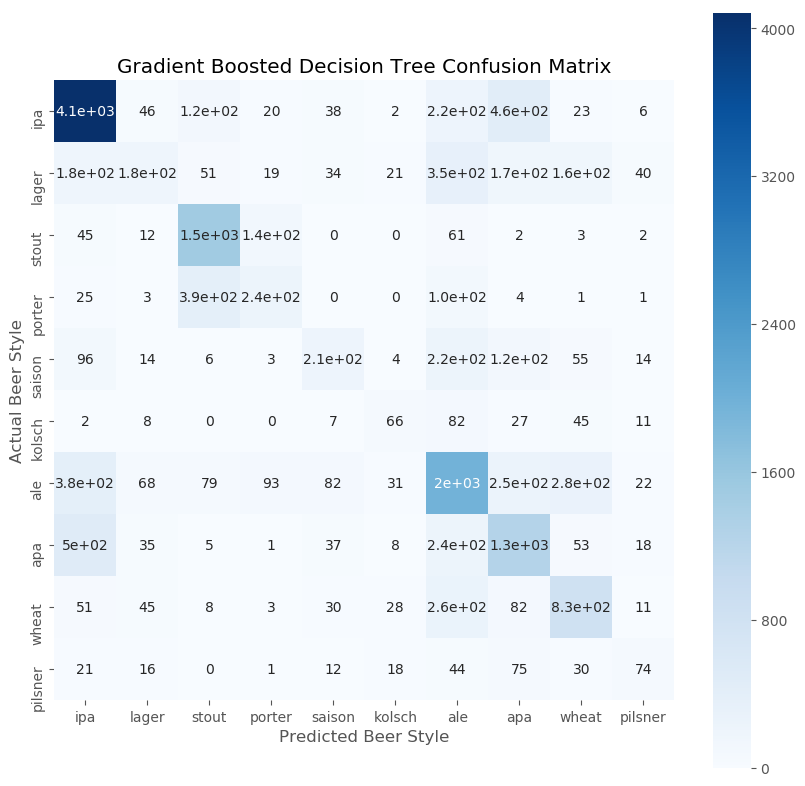

In [150]:
plt.figure(figsize = (10,10),dpi = 100)
sns.heatmap(gb_confusion, cmap= plt.cm.Blues, annot = True, square = True, xticklabels = style_list, yticklabels = style_list)

plt.xlabel('Predicted Beer Style');
plt.ylabel('Actual Beer Style');
plt.title("Gradient Boosted Decision Tree Confusion Matrix");

IPA

In [258]:
#Input styles here:

y_test_style = y_test_ipa
X_test_style = X_test_ipa

y_train_style = y_train_ipa
X_train_style = X_train_ipa

In [259]:
model_rf_gb_ipa = GradientBoostingClassifier()
model_rf_gb_ipa.fit(X_train_style, y_train_style)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [260]:
print('Train Accuracy:',model_rf_gb_ipa.score(X_train_style, y_train_style), 'Test Accuracy: ',model_rf_gb_ipa.score(X_test_style, y_test_style))

Train Accuracy: 0.8777360610936582 Test Accuracy:  0.8734207389749702


In [261]:
model_rf_gb_ipa_pred = model_rf_gb_ipa.predict(X_test_style)
roc_auc_score(y_test_style, model_rf_gb_ipa_pred)

0.8399306677622531

In [262]:
if roc_auc_score(y_test_style, model_rf_gb_ipa_pred)>roc_auc_score(y_test_style, knn_model_ipa_pred):
    print("Gradient Boost ROC Score better than KNN")
else:
    print("KNN ROC Score better than Gradient Boost")

Gradient Boost ROC Score better than KNN


In [263]:
print('F1:',metrics.f1_score(y_test_style, model_rf_gb_ipa_pred))
print('Accuracy:', metrics.accuracy_score(y_test_style, model_rf_gb_ipa_pred))
print('Precision:', metrics.precision_score(y_test_style, model_rf_gb_ipa_pred))
print('Recall:', metrics.recall_score(y_test_style, model_rf_gb_ipa_pred))

F1: 0.7813915191436805
Accuracy: 0.8734207389749702
Precision: 0.8078314535007448
Recall: 0.7566274666135141


Lager

In [265]:
#Input styles here:

y_test_style = y_test_lager
X_test_style = X_test_lager

y_train_style = y_train_lager
X_train_style = X_train_lager

In [266]:
model_rf_gb_lager = GradientBoostingClassifier()
model_rf_gb_lager.fit(X_train_style, y_train_style)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [267]:
print('Train Accuracy:',model_rf_gb_lager.score(X_train_style, y_train_style), 'Test Accuracy: ',model_rf_gb_lager.score(X_test_style, y_test_style))

Train Accuracy: 0.9313207161647894 Test Accuracy:  0.930393325387366


In [268]:
model_rf_gb_lager_pred = model_rf_gb_lager.predict(X_test_style)
roc_auc_score(y_test_style, model_rf_gb_lager_pred)

0.5302891390400423

In [269]:
if roc_auc_score(y_test_style, model_rf_gb_lager_pred)>roc_auc_score(y_test_style, rf_model_lager_pred):
    print("Gradient Boost ROC Score better than Random Forest")
else:
    print("Random Forest ROC Score better than Gradient Boost")

Random Forest ROC Score better than Gradient Boost


In [270]:
print('F1:',metrics.f1_score(y_test_style, model_rf_gb_lager_pred))
print('Accuracy:', metrics.accuracy_score(y_test_style, model_rf_gb_lager_pred))
print('Precision:', metrics.precision_score(y_test_style, model_rf_gb_lager_pred))
print('Recall:', metrics.recall_score(y_test_style, model_rf_gb_lager_pred))

F1: 0.11515151515151516
Accuracy: 0.930393325387366
Precision: 0.6666666666666666
Recall: 0.06301824212271974


Stout

In [272]:
#Input styles here:

y_test_style = y_test_stout
X_test_style = X_test_stout

y_train_style = y_train_stout
X_train_style = X_train_stout

In [273]:
model_rf_gb_stout = GradientBoostingClassifier()
model_rf_gb_stout.fit(X_train_style, y_train_style)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [274]:
print('Train Accuracy:',model_rf_gb_stout.score(X_train_style, y_train_style), 'Test Accuracy: ',model_rf_gb_stout.score(X_test_style, y_test_style))

Train Accuracy: 0.9504252547697495 Test Accuracy:  0.9469010727056019


In [275]:
model_rf_gb_stout_pred = model_rf_gb_stout.predict(X_test_style)
roc_auc_score(y_test_style, model_rf_gb_stout_pred)

0.8789732915122136

In [276]:
if roc_auc_score(y_test_style, model_rf_gb_stout_pred)>roc_auc_score(y_test_style, knn_model_stout_pred):
    print("Gradient Boost ROC Score better than KNN")
else:
    print("KNN ROC Score better than Gradient Boost")

Gradient Boost ROC Score better than KNN


In [ ]:
print('F1:',metrics.f1_score(y_test_style, model_rf_gb_stout_pred))
print('Accuracy:', metrics.accuracy_score(y_test_style, model_rf_gb_stout_pred))
print('Precision:', metrics.precision_score(y_test_style, model_rf_gb_stout_pred))
print('Recall:', metrics.recall_score(y_test_style, model_rf_gb_stout_pred))

Porter

In [277]:
#Input styles here:

y_test_style = y_test_porter
X_test_style = X_test_porter

y_train_style = y_train_porter
X_train_style = X_train_porter

In [278]:
model_rf_gb_porter = GradientBoostingClassifier()
model_rf_gb_porter.fit(X_train_style, y_train_style)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [279]:
print('Train Accuracy:',model_rf_gb_porter.score(X_train_style, y_train_style), 'Test Accuracy: ',model_rf_gb_porter.score(X_test_style, y_test_style))

Train Accuracy: 0.9579853395652951 Test Accuracy:  0.9552443384982121


In [280]:
model_rf_gb_porter_pred = model_rf_gb_porter.predict(X_test_style)
roc_auc_score(y_test_style, model_rf_gb_porter_pred)

0.5503018949967232

In [281]:
if roc_auc_score(y_test_style, model_rf_gb_porter_pred)>roc_auc_score(y_test_style, rf_model_porter_pred):
    print("Gradient Boost ROC Score better than Random Forest")
else:
    print("Random Forest ROC Score better than Gradient Boost")

Random Forest ROC Score better than Gradient Boost


In [282]:
print('F1:',metrics.f1_score(y_test_style, model_rf_gb_porter_pred))
print('Accuracy:', metrics.accuracy_score(y_test_style, model_rf_gb_porter_pred))
print('Precision:', metrics.precision_score(y_test_style, model_rf_gb_porter_pred))
print('Recall:', metrics.recall_score(y_test_style, model_rf_gb_porter_pred))

F1: 0.17563117453347968
Accuracy: 0.9552443384982121
Precision: 0.5405405405405406
Recall: 0.10484927916120576


Saison

In [108]:
#Input styles here:

y_test_style = y_test_saison
X_test_style = X_test_saison

y_train_style = y_train_saison
X_train_style = X_train_saison

In [109]:
model_rf_gb_saison = GradientBoostingClassifier()
model_rf_gb_saison.fit(X_train_style, y_train_style)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [110]:
print('Train Accuracy:',model_rf_gb_saison.score(X_train_style, y_train_style), 'Test Accuracy: ',model_rf_gb_saison.score(X_test_style, y_test_style))

Train Accuracy: 0.9582407478354149 Test Accuracy:  0.9571513706793802


In [286]:
model_rf_gb_saison_pred = model_rf_gb_saison.predict(X_test_style)
roc_auc_score(y_test_style, model_rf_gb_saison_pred)

0.5481281035908953

In [287]:
if roc_auc_score(y_test_style, model_rf_gb_saison_pred)>roc_auc_score(y_test_style, rf_model_saison_pred):
    print("Gradient Boost ROC Score better than Random Forest")
else:
    print("Random Forest ROC Score better than Gradient Boost")

Random Forest ROC Score better than Gradient Boost


In [288]:
print('F1:',metrics.f1_score(y_test_style, model_rf_gb_saison_pred))
print('Accuracy:', metrics.accuracy_score(y_test_style, model_rf_gb_saison_pred))
print('Precision:', metrics.precision_score(y_test_style, model_rf_gb_saison_pred))
print('Recall:', metrics.recall_score(y_test_style, model_rf_gb_saison_pred))

F1: 0.17090069284064663
Accuracy: 0.9572109654350417
Precision: 0.6218487394957983
Recall: 0.09906291834002677


Kolsch

In [289]:
#Input styles here:

y_test_style = y_test_kolsch
X_test_style = X_test_kolsch

y_train_style = y_train_kolsch
X_train_style = X_train_kolsch

In [290]:
model_rf_gb_kolsch = GradientBoostingClassifier()
model_rf_gb_kolsch.fit(X_train_style, y_train_style)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [291]:
print('Train Accuracy:',model_rf_gb_kolsch.score(X_train_style, y_train_style), 'Test Accuracy: ',model_rf_gb_kolsch.score(X_test_style, y_test_style))

Train Accuracy: 0.9865144433376752 Test Accuracy:  0.9855184743742551


In [292]:
model_rf_gb_kolsch_pred = model_rf_gb_kolsch.predict(X_test_style)
roc_auc_score(y_test_style, model_rf_gb_kolsch_pred)

0.5438406843423896

In [293]:
if roc_auc_score(y_test_style, model_rf_gb_kolsch_pred)>roc_auc_score(y_test_style, rf_model_kolsch_pred):
    print("Gradient Boost ROC Score better than Random Forest")
else:
    print("Random Forest ROC Score better than Gradient Boost")

Random Forest ROC Score better than Gradient Boost


In [294]:
print('F1:',metrics.f1_score(y_test_style, model_rf_gb_kolsch_pred))
print('Accuracy:', metrics.accuracy_score(y_test_style, model_rf_gb_kolsch_pred))
print('Precision:', metrics.precision_score(y_test_style, model_rf_gb_kolsch_pred))
print('Recall:', metrics.recall_score(y_test_style, model_rf_gb_kolsch_pred))

F1: 0.15331010452961671
Accuracy: 0.9855184743742551
Precision: 0.5641025641025641
Recall: 0.08870967741935484


Ale

In [295]:
#Input styles here:

y_test_style = y_test_ale
X_test_style = X_test_ale

y_train_style = y_train_ale
X_train_style = X_train_ale

In [296]:
model_rf_gb_ale = GradientBoostingClassifier()
model_rf_gb_ale.fit(X_train_style, y_train_style)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [297]:
print('Train Accuracy:',model_rf_gb_ale.score(X_train_style, y_train_style), 'Test Accuracy: ',model_rf_gb_ale.score(X_test_style, y_test_style))

Train Accuracy: 0.8550558067070212 Test Accuracy:  0.8486293206197855


In [298]:
model_rf_gb_ale_pred = model_rf_gb_ale.predict(X_test_style)
roc_auc_score(y_test_style, model_rf_gb_ale_pred)

0.6719774545861503

In [299]:
if roc_auc_score(y_test_style, model_rf_gb_ale_pred)>roc_auc_score(y_test_style, rf_model_ale_pred):
    print("Gradient Boost ROC Score better than Random Forest")
else:
    print("Random Forest ROC Score better than Gradient Boost")

Gradient Boost ROC Score better than Random Forest


In [300]:
print('F1:',metrics.f1_score(y_test_style, model_rf_gb_ale_pred))
print('Accuracy:', metrics.accuracy_score(y_test_style, model_rf_gb_ale_pred))
print('Precision:', metrics.precision_score(y_test_style, model_rf_gb_ale_pred))
print('Recall:', metrics.recall_score(y_test_style, model_rf_gb_ale_pred))

F1: 0.49563145353455124
Accuracy: 0.8486293206197855
Precision: 0.701123595505618
Recall: 0.3832923832923833


APA

In [301]:
#Input styles here:

y_test_style = y_test_apa
X_test_style = X_test_apa

y_train_style = y_train_apa
X_train_style = X_train_apa

In [302]:
model_rf_gb_apa = GradientBoostingClassifier()
model_rf_gb_apa.fit(X_train_style, y_train_style)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [303]:
print('Train Accuracy:',model_rf_gb_apa.score(X_train_style, y_train_style), 'Test Accuracy: ',model_rf_gb_apa.score(X_test_style, y_test_style))

Train Accuracy: 0.8926519040686537 Test Accuracy:  0.8950536352800954


In [304]:
model_rf_gb_apa_pred = model_rf_gb_apa.predict(X_test_style)
roc_auc_score(y_test_style, model_rf_gb_apa_pred)

0.6851869831637813

In [305]:
if roc_auc_score(y_test_style, model_rf_gb_apa_pred)>roc_auc_score(y_test_style, rf_model_apa_pred):
    print("Gradient Boost ROC Score better than Random Forest")
else:
    print("Random Forest ROC Score better than Gradient Boost")

Gradient Boost ROC Score better than Random Forest


In [306]:
print('F1:',metrics.f1_score(y_test_style, model_rf_gb_apa_pred))
print('Accuracy:', metrics.accuracy_score(y_test_style, model_rf_gb_apa_pred))
print('Precision:', metrics.precision_score(y_test_style, model_rf_gb_apa_pred))
print('Recall:', metrics.recall_score(y_test_style, model_rf_gb_apa_pred))

F1: 0.4964255075779239
Accuracy: 0.8950536352800954
Precision: 0.646795827123696
Recall: 0.40278422273781905


Wheat

In [307]:
#Input styles here:

y_test_style = y_test_wheat
X_test_style = X_test_wheat

y_train_style = y_train_wheat
X_train_style = X_train_wheat

In [308]:
model_rf_gb_wheat = GradientBoostingClassifier()
model_rf_gb_wheat.fit(X_train_style, y_train_style)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [309]:
print('Train Accuracy:',model_rf_gb_wheat.score(X_train_style, y_train_style), 'Test Accuracy: ',model_rf_gb_wheat.score(X_test_style, y_test_style))

Train Accuracy: 0.9422521901259163 Test Accuracy:  0.9402860548271752


In [310]:
model_rf_gb_wheat_pred = model_rf_gb_wheat.predict(X_test_style)
roc_auc_score(y_test_style, model_rf_gb_wheat_pred)

0.7313954887306295

In [311]:
if roc_auc_score(y_test_style, model_rf_gb_wheat_pred)>roc_auc_score(y_test_style, rf_model_wheat_pred):
    print("Gradient Boost ROC Score better than Random Forest")
else:
    print("Random Forest ROC Score better than Gradient Boost")

Gradient Boost ROC Score better than Random Forest


In [312]:
print('F1:',metrics.f1_score(y_test_style, model_rf_gb_wheat_pred))
print('Accuracy:', metrics.accuracy_score(y_test_style, model_rf_gb_wheat_pred))
print('Precision:', metrics.precision_score(y_test_style, model_rf_gb_wheat_pred))
print('Recall:', metrics.recall_score(y_test_style, model_rf_gb_wheat_pred))

F1: 0.5647263249348392
Accuracy: 0.9402860548271752
Precision: 0.680628272251309
Recall: 0.4825538233110616


Pilsner

In [313]:
#Input styles here:

y_test_style = y_test_pilsner
X_test_style = X_test_pilsner

y_train_style = y_train_pilsner
X_train_style = X_train_pilsner

In [314]:
model_rf_gb_pilsner = GradientBoostingClassifier()
model_rf_gb_pilsner.fit(X_train_style, y_train_style)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [315]:
print('Train Accuracy:',model_rf_gb_pilsner.score(X_train_style, y_train_style), 'Test Accuracy: ',model_rf_gb_pilsner.score(X_test_style, y_test_style))

Train Accuracy: 0.9841391464255612 Test Accuracy:  0.9829558998808104


In [316]:
model_rf_gb_pilsner_pred = model_rf_gb_pilsner.predict(X_test_style)
roc_auc_score(y_test_style, model_rf_gb_pilsner_pred)

0.5423488615444765

In [317]:
if roc_auc_score(y_test_style, model_rf_gb_pilsner_pred)>roc_auc_score(y_test_style, rf_model_pilsner_pred):
    print("Gradient Boost ROC Score better than Random Forest")
else:
    print("Random Forest ROC Score better than Gradient Boost")

Gradient Boost ROC Score better than Random Forest


In [318]:
print('F1:',metrics.f1_score(y_test_style, model_rf_gb_pilsner_pred))
print('Accuracy:', metrics.accuracy_score(y_test_style, model_rf_gb_pilsner_pred))
print('Precision:', metrics.precision_score(y_test_style, model_rf_gb_pilsner_pred))
print('Recall:', metrics.recall_score(y_test_style, model_rf_gb_pilsner_pred))

F1: 0.1488095238095238
Accuracy: 0.9829558998808104
Precision: 0.5555555555555556
Recall: 0.0859106529209622


**Gaussian Naive Bayes**

In [320]:
model_gnb = GaussianNB()

In [321]:
model_gnb.fit(X_train, y_train)

GaussianNB(priors=None)

In [322]:
gnb_pred = model_gnb.predict(X_test)

In [323]:
model_gnb.score(X_test, y_test)

0.4088200238379023

In [324]:
#Use RF as baseline as some individual models perform better with RF than with Gradient Boost

if model_gnb.score(X_test, y_test)>rf_model.score(X_test, y_test):
    print("Overall Naive Bayes Accuracy better than Random Forest - check individual styles")
else:
    print("Overall Random Forest Accuracy better than Naive Bayes, move on to next model")

Overall Random Forest Accuracy better than Naive Bayes, move on to next model


Saison

In [132]:
#Input styles here:

y_test_style = y_test_saison
X_test_style = X_test_saison

y_train_style = y_train_saison
X_train_style = X_train_saison

In [133]:
model_gnb_saison = GaussianNB()
model_gnb_saison.fit(X_train_style, y_train_style)

GaussianNB(priors=None)

In [134]:
print('Train Accuracy:',model_gnb_saison.score(X_train_style, y_train_style), 'Test Accuracy: ',model_gnb_saison.score(X_test_style, y_test_style))

Train Accuracy: 0.711695144688785 Test Accuracy:  0.7228247914183552


In [135]:
model_gnb_saison_pred = model_gnb_saison.predict(X_test_style)
roc_auc_score(y_test_style, model_gnb_saison_pred)

0.7145605645518099

In [136]:
if roc_auc_score(y_test_style, model_gnb_saison_pred)>roc_auc_score(y_test_style, rf_model_saison_pred):
    print("GNB ROC Score better than Random Forest")
else:
    print("Random Forest ROC Score better than GNB")

GNB ROC Score better than Random Forest


In [137]:
print('F1:',metrics.f1_score(y_test_style, model_gnb_saison_pred))
print('Accuracy:', metrics.accuracy_score(y_test_style, model_gnb_saison_pred))
print('Precision:', metrics.precision_score(y_test_style, model_gnb_saison_pred))
print('Recall:', metrics.recall_score(y_test_style, model_gnb_saison_pred))

F1: 0.1847502191060473
Accuracy: 0.7228247914183552
Precision: 0.10629286002420331
Recall: 0.7054886211512718


In [139]:
y_test_saison.sum()

747

**SVM**

In [325]:
model_svm = SVC()

In [326]:
model_svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [327]:
svm_pred = model_svm.predict(X_test)

In [328]:
model_svm.score(X_test, y_test)

0.49451728247914184

In [329]:
#Use RF as baseline as some individual models perform better with RF than with Gradient Boost

if model_svm.score(X_test, y_test)>rf_model.score(X_test, y_test):
    print("Overall SVM Accuracy better than KNN - check individual styles")
else:
    print("Overall KNN Accuracy better than SVM, move on to next model")

Overall KNN Accuracy better than SVM, move on to next model


**Neural Net**

In [330]:
X_train.shape

(39153, 14)

In [331]:
X_test.shape

(16780, 14)

In [332]:
ohe = LabelEncoder().fit(y_train)
y_train_nn = ohe.transform(y_train)
y_test_nn = ohe.transform(y_test)
y_train_nn = np_utils.to_categorical(y_train_nn)
y_test_nn = np_utils.to_categorical(y_test_nn)

In [333]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(8, input_dim = 14, activation = 'relu'))
model.add(Dense(12, activation = 'tanh'))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.fit(X_train, y_train_nn, epochs = 10, batch_size = 10)

Epoch 1/10
39153/39153 [==============================] - 5s 128us/step - loss: 1.5231 - acc: 0.4765
Epoch 2/10
39153/39153 [==============================] - 5s 118us/step - loss: 1.3645 - acc: 0.5230
Epoch 3/10
39153/39153 [==============================] - 5s 115us/step - loss: 1.3378 - acc: 0.5279
Epoch 4/10
39153/39153 [==============================] - 5s 117us/step - loss: 1.3275 - acc: 0.5328
Epoch 5/10
39153/39153 [==============================] - 5s 117us/step - loss: 1.3218 - acc: 0.5338
Epoch 6/10
39153/39153 [==============================] - 5s 116us/step - loss: 1.3156 - acc: 0.5374
Epoch 7/10
39153/39153 [==============================] - 5s 136us/step - loss: 1.3085 - acc: 0.5393
Epoch 8/10
39153/39153 [==============================] - 5s 137us/step - loss: 1.3010 - acc: 0.5424 2s - ETA: 0s - loss: 1.3033 
Epoch 9/10
39153/39153 [==============================] - 5s 121us/step - loss: 1.2967 - acc: 0.5422 1s - - ETA: 0s - loss: 1.2973 -
Epoch 10/10
39153/39153 [=====

In [334]:
train_scores = model.evaluate(X_train, y_train_nn)
train_scores

39153/39153 [==============================] - 1s 13us/step


[1.2859666419054203, 0.547544249494977]

In [335]:
test_scores = model.evaluate(X_test, y_test_nn)
test_scores

16780/16780 [==============================] - 0s 14us/step


[1.2840528473666513, 0.5512514898546831]

In [336]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 120       
_________________________________________________________________
dense_2 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                130       
Total params: 358
Trainable params: 358
Non-trainable params: 0
_________________________________________________________________


In [337]:
preds_nn = model.predict(X_test)
preds_class = model.predict_classes(X_test)

In [338]:
preds_class.shape

(16780,)

In [339]:
#Check working correctly - predicting style 8 because has highest probability:

print(preds_class[0], preds_nn[0], y_test_nn[0])

8 [0.04531846 0.17737567 0.00185378 0.00129594 0.08318979 0.02970044
 0.24175045 0.04741991 0.361413   0.01068255] [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [340]:
print("NN Accuracy: ", test_scores[1])

NN Accuracy:  0.5512514898546831


In [344]:
#Use RF as baseline as some individual models perform better with RF than with Gradient Boost

if test_scores[1]>rf_model.score(X_test, y_test):
    print("Overall NN Accuracy better than Random Forest - check ensemble")
else:
    print("Overall Random Forest Accuracy better than NN, use Random Forest in ensemble")

Overall Random Forest Accuracy better than NN, use Random Forest in ensemble


In [343]:
if test_scores[1]>model_rf_gb.score(X_test, y_test):
    print("Overall NN Accuracy better than Gradient Boost")
else:
    print("Overall Gradient Boost Accuracy better than NN")

Overall Gradient Boost Accuracy better than NN


*Adjust for imbalanced classes*

In [667]:
import imblearn.over_sampling

In [689]:
ROS = imblearn.over_sampling.RandomOverSampler(ratio = 'auto', random_state = 4444)

In [690]:
y_train.unique()

array([ 8,  1,  7,  2,  3,  9,  5,  6, 10,  4])

In [691]:
X_train.describe()

,size,og,fg,abv,ibu,color,boilsize,boiltime,boilgravity,efficiency,allgrain,biab,partialmash,extract
count,39153.000000,39153.000000,39153.000000,39153.000000,39153.000000,39153.000000,39153.000000,39153.000000,39153.000000,39153.000000,39153.000000,39153.000000,39153.000000,39153.000000
mean,45.733747,1.415365,1.076901,6.112521,47.564113,13.411178,51.720025,64.988379,1.356284,66.294342,0.679131,0.168084,0.043522,0.109264
std,188.494853,2.229805,0.432528,1.705952,38.806361,12.545077,200.671489,13.835574,1.956732,13.860540,0.466817,0.373946,0.204031,0.311974
min,1.000000,1.000000,0.598715,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.930000,1.051000,1.011000,5.120000,25.490000,5.000000,22.000000,60.000000,1.040000,65.000000,0.000000,0.000000,0.000000,0.000000
50%,20.820000,1.058000,1.013000,5.820000,38.810000,7.760000,28.000000,60.000000,1.047000,70.000000,1.000000,0.000000,0.000000,0.000000
75%,24.000000,1.068000,1.016000,6.790000,61.050000,16.260000,30.000000,60.000000,1.059000,75.000000,1.000000,0.000000,0.000000,0.000000
max,9200.000000,32.500800,9.861370,54.720000,1605.830000,50.000000,9700.000000,240.000000,52.600000,100.000000,1.000000,1.000000,1.000000,1.000000


In [692]:
X_tr_rs, y_tr_rs = ROS.fit_sample(X_train, y_train)

In [739]:
lr = LogisticRegression() 
lr.fit(X_train, y_train)

print('Simple Logistic Regression; Test F1: %.3f'%\
      f1_score(y_test,lr.predict(X_test), average = "weighted"))


Simple Logistic Regression; Test F1: 0.448


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [736]:
lr.score(X_train, y_train)

0.5224376165300233

In [738]:
lr_os = LogisticRegression() 
lr_os.fit(X_tr_rs, y_tr_rs)
    

print('Logistic Regression on Oversampled Train Data; Test F1: %.3f'%\
      (f1_score(y_test, lr_os.predict(X_test), average = 'weighted')))

Logistic Regression on Oversampled Train Data; Test F1: 0.492


In [810]:
print("This is worse than above:", lr_os.score(X_tr_rs, y_tr_rs))

This is worse than above: 0.4551745147532422


In [747]:
knn_model.fit(X_tr_rs, y_tr_rs)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

In [748]:
knn_os_pred = knn_model.predict(X_test)

In [811]:
metrics.accuracy_score(y_test, knn_os_pred)

0.45840286054827173

In [751]:
knn_os_confusion = confusion_matrix(y_test, knn_os_pred)

Text(0.5,1,'KNN Oversampling Confusion Matrix')

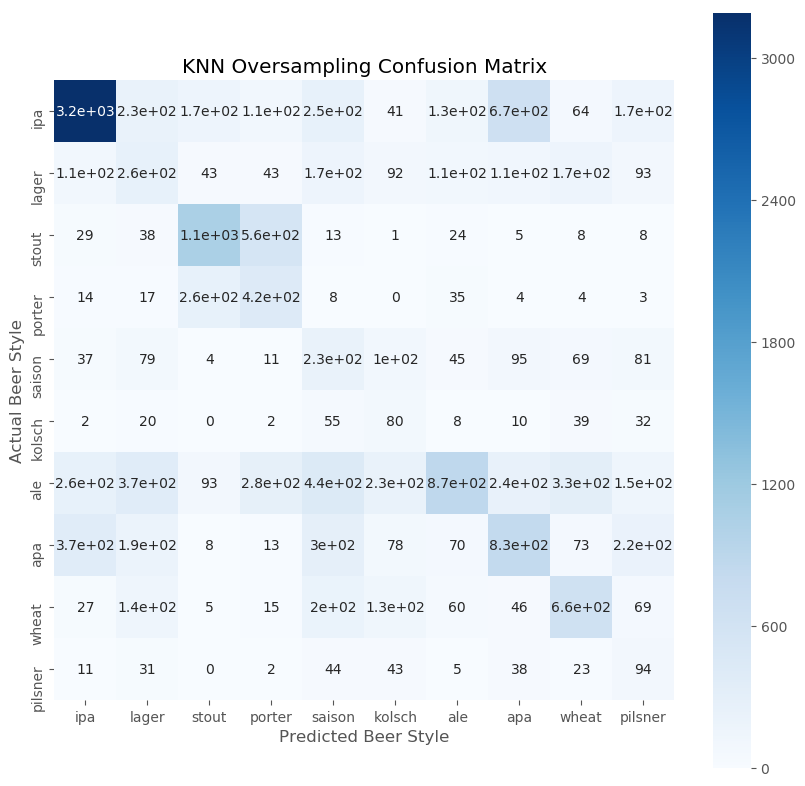

In [752]:
plt.figure(figsize = (10,10),dpi = 100)
sns.heatmap(knn_os_confusion, cmap= plt.cm.Blues, annot = True, square = True, xticklabels = style_list, yticklabels = style_list)

plt.xlabel('Predicted Beer Style')
plt.ylabel('Actual Beer Style')
plt.title("KNN Oversampling Confusion Matrix")

In [802]:
rf_model_os = RandomForestClassifier(random_state = 4444)

In [803]:
rf_model_os.fit(X_tr_rs, y_tr_rs)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=4444, verbose=0,
            warm_start=False)

In [804]:
rf_pred_os = rf_model_os.predict(X_test)

In [808]:
print("This is worse than above:", metrics.accuracy_score(y_test, rf_pred_os))

This is worse than above: 0.583969010727056


# Summary

In [349]:
'''

Imbalanced class correction did not work with random over-sampling.
Move on to model tuning / feature selection & emsembling

Gradient Boost - IPA, Stout, Ale, APA, Wheat and Pilsner slightly better than RF
Random Forest - Lager, Porter, Saison, Kolsch slightly better than GB
NN - May also want to try neural net in emsembling, especially since some accuracies remain ~0.5

'''

'\n\nImbalanced class correction did not work with random over-sampling.\nMove on to model tuning / feature selection & emsembling\n\nGradient Boost - IPA, Stout, Ale, APA, Wheat and Pilsner slightly better than RF\nRandom Forest - Lager, Porter, Saison, Kolsch slightly better than GB\nNN - May also want to try neural net in emsembling, especially since some accuracies remain ~0.5\n\n'

In [71]:
models = [LogisticRegression(C=10), KNeighborsClassifier(n_neighbors = 15), DecisionTreeClassifier(random_state=4444),RandomForestClassifier(random_state=4444),GradientBoostingClassifier(), GaussianNB(),SVC()] 
         
model_names = ["Logistic Regression", "KNN", "Decision Tree", "Random Forest", "Gradient Boost",'Gaussian Naive Bayes','SVC']

In [73]:
roc_list = []
for model, name in zip(models, model_names):
    model.fit(X_train_ipa, y_train_ipa)
    preds = model.predict(X_test_ipa)
    fpr, tpr, _ = roc_curve(y_test_ipa, preds)
    auc_score = auc(fpr, tpr)
    roc_list.append((name, tpr, fpr, auc_score))

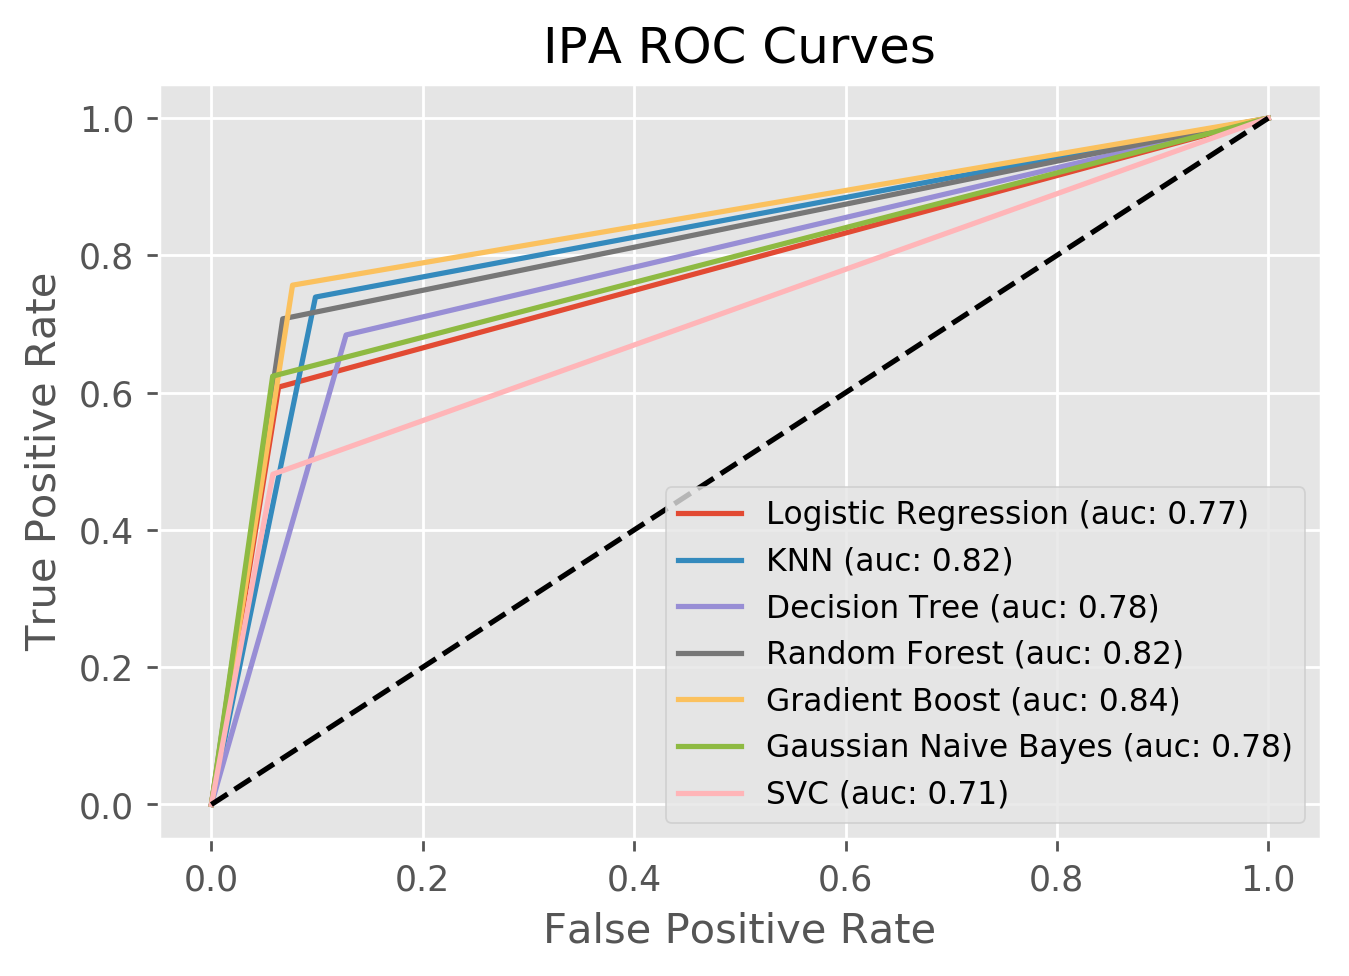

In [74]:
plt.figure(dpi=250)
for name, tpr, fpr, auc_score in roc_list:
    plt.plot(fpr, tpr, label=name+' (auc: %.2f)'%auc_score)
plt.legend(loc='lower right', fontsize=9)
plt.plot([0, 1], [0, 1], color='k', linestyle='--');
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("IPA ROC Curves");

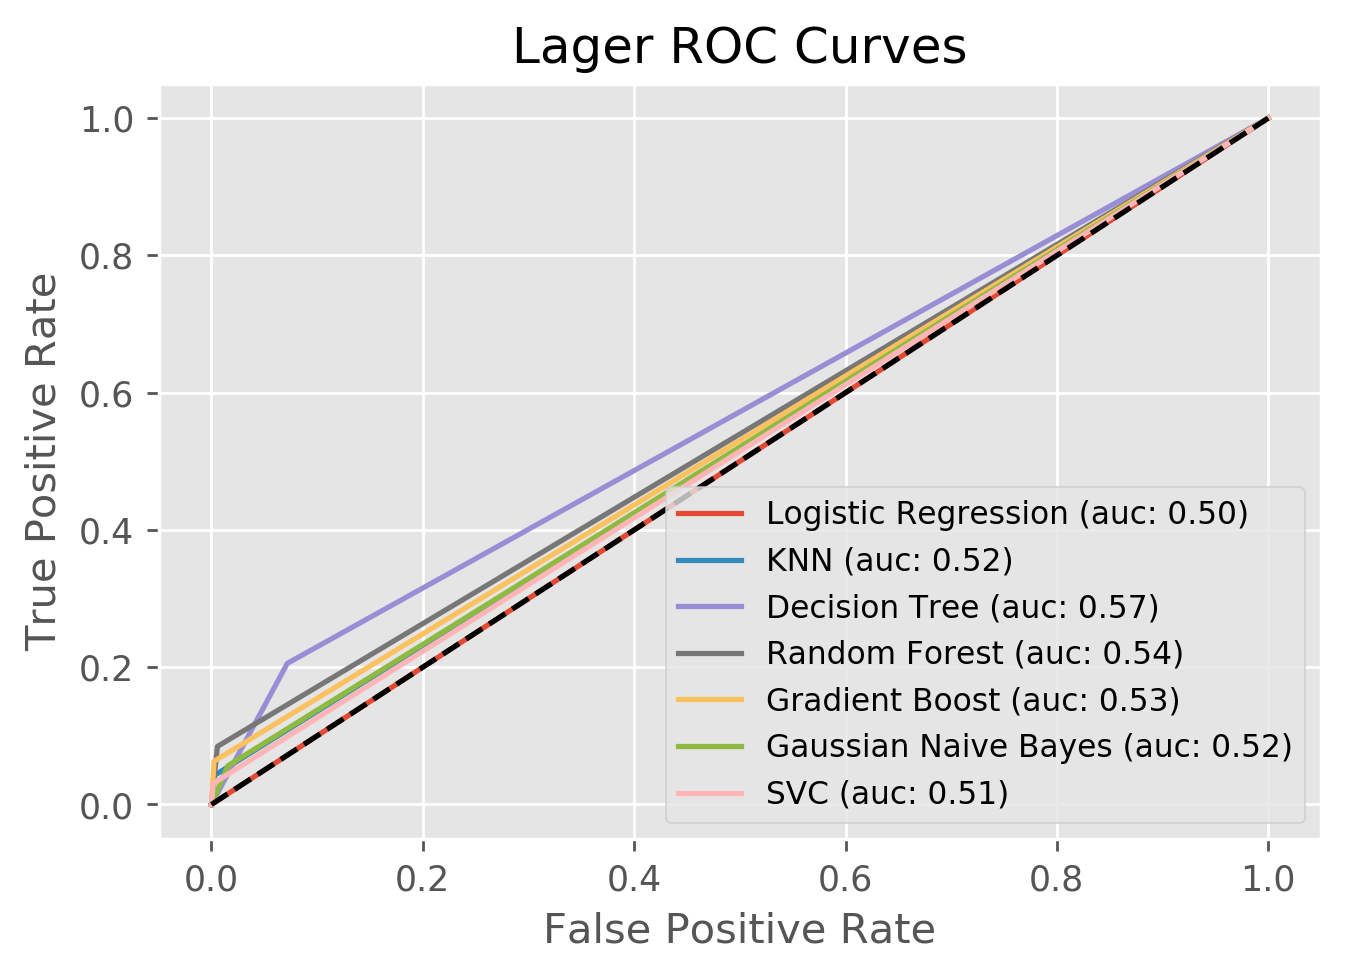

In [78]:
lager_roc_list = []
for model, name in zip(models, model_names):
    model.fit(X_train_lager, y_train_lager)
    preds = model.predict(X_test_lager)
    fpr, tpr, _ = roc_curve(y_test_lager, preds)
    auc_score = auc(fpr, tpr)
    lager_roc_list.append((name, tpr, fpr, auc_score))

plt.figure(dpi=250)
for name, tpr, fpr, auc_score in lager_roc_list:
    plt.plot(fpr, tpr, label=name+' (auc: %.2f)'%auc_score)
plt.legend(loc='lower right', fontsize=9)
plt.plot([0, 1], [0, 1], color='k', linestyle='--');
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Lager ROC Curves");

In [75]:
stout_roc_list = []
for model, name in zip(models, model_names):
    model.fit(X_train_stout, y_train_stout)
    preds = model.predict(X_test_stout)
    fpr, tpr, _ = roc_curve(y_test_stout, preds)
    auc_score = auc(fpr, tpr)
    stout_roc_list.append((name, tpr, fpr, auc_score))

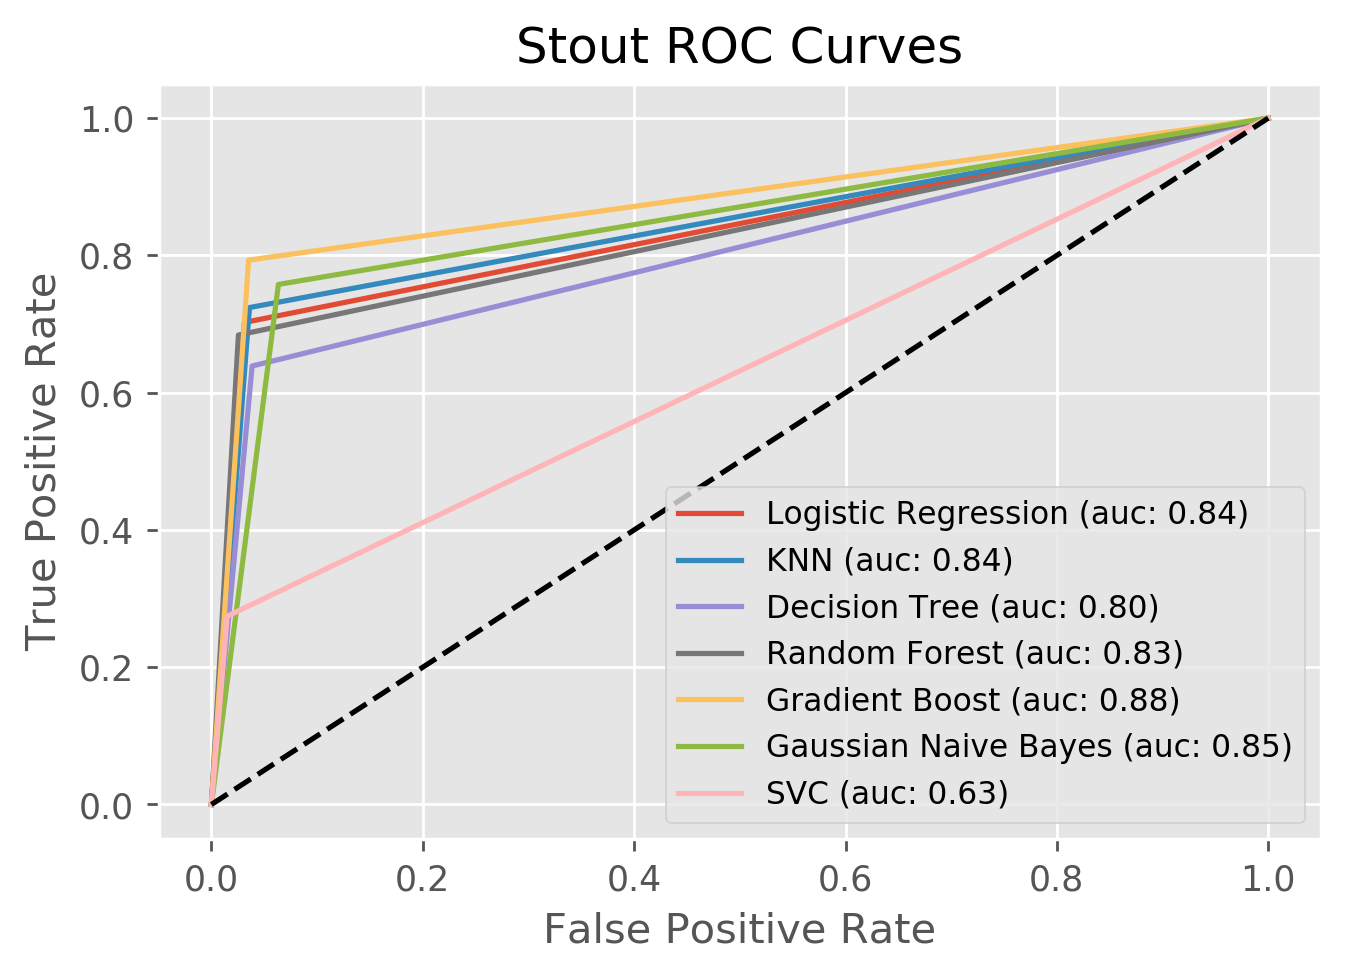

In [76]:
plt.figure(dpi=250)
for name, tpr, fpr, auc_score in stout_roc_list:
    plt.plot(fpr, tpr, label=name+' (auc: %.2f)'%auc_score)
plt.legend(loc='lower right', fontsize=9)
plt.plot([0, 1], [0, 1], color='k', linestyle='--');
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Stout ROC Curves");

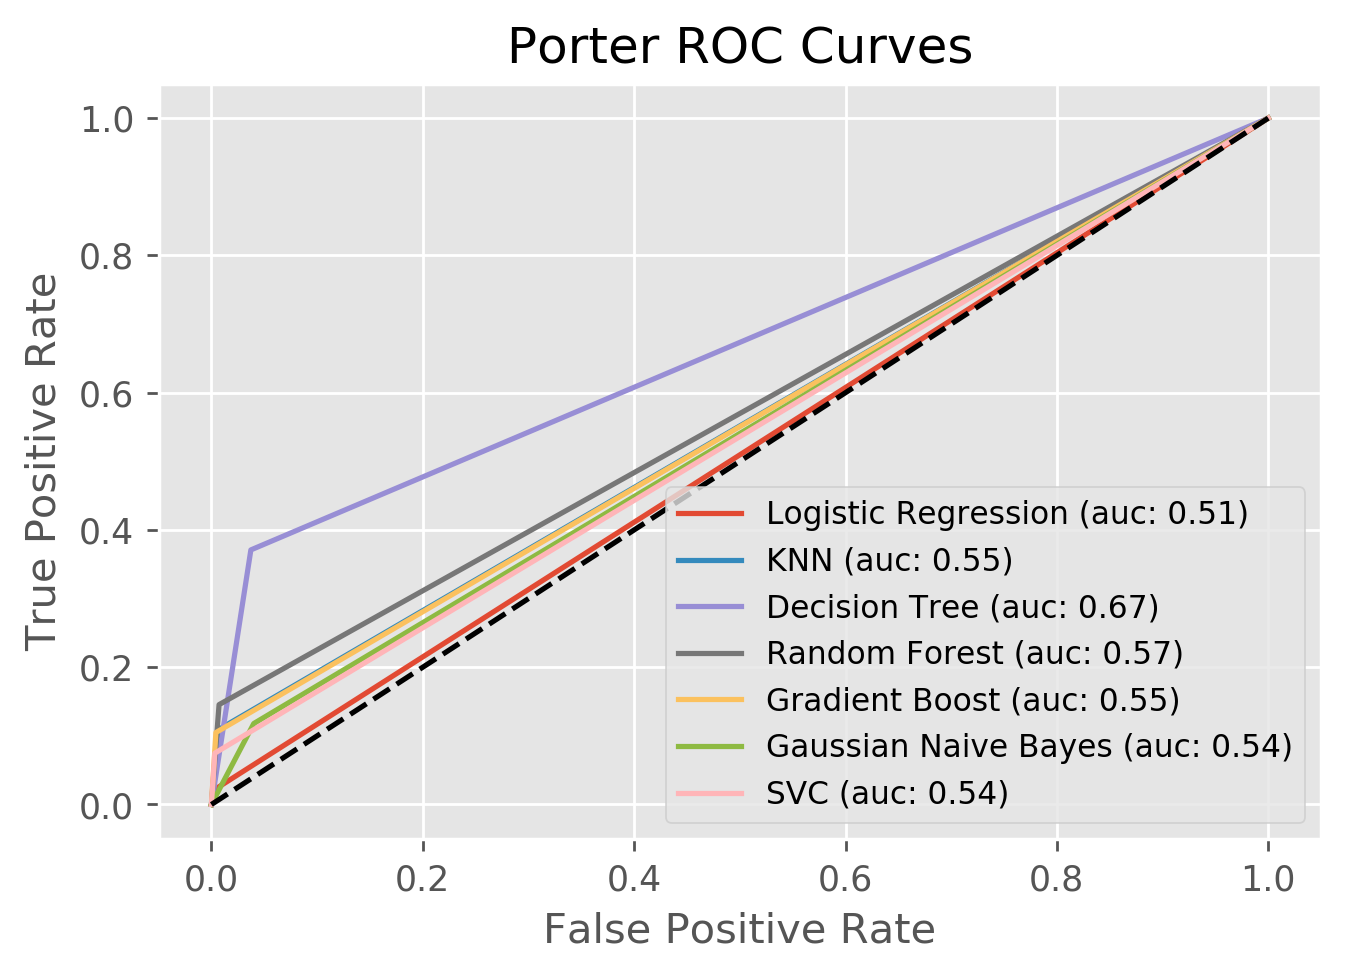

In [79]:
porter_roc_list = []
for model, name in zip(models, model_names):
    model.fit(X_train_porter, y_train_porter)
    preds = model.predict(X_test_porter)
    fpr, tpr, _ = roc_curve(y_test_porter, preds)
    auc_score = auc(fpr, tpr)
    porter_roc_list.append((name, tpr, fpr, auc_score))

plt.figure(dpi=250)
for name, tpr, fpr, auc_score in porter_roc_list:
    plt.plot(fpr, tpr, label=name+' (auc: %.2f)'%auc_score)
plt.legend(loc='lower right', fontsize=9)
plt.plot([0, 1], [0, 1], color='k', linestyle='--');
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Porter ROC Curves");

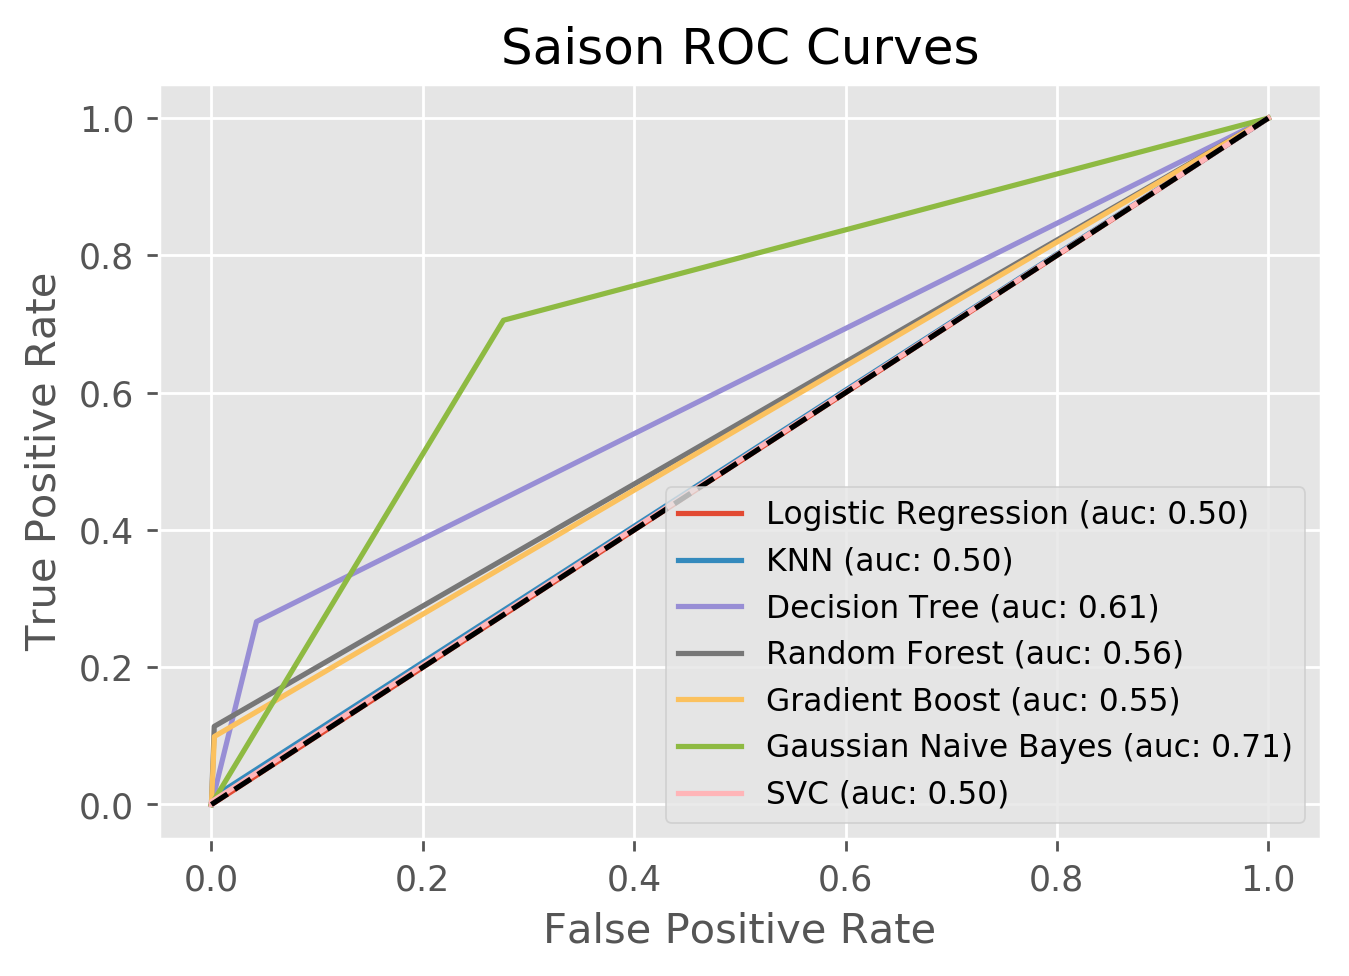

In [95]:
#Saison
saison_roc_list = []
for model, name in zip(models, model_names):
    model.fit(X_train_saison, y_train_saison)
    preds = model.predict(X_test_saison)
    fpr, tpr, _ = roc_curve(y_test_saison, preds)
    auc_score = auc(fpr, tpr)
    saison_roc_list.append((name, tpr, fpr, auc_score))

plt.figure(dpi=250)
for name, tpr, fpr, auc_score in saison_roc_list:
    plt.plot(fpr, tpr, label=name+' (auc: %.2f)'%auc_score)
plt.legend(loc='lower right', fontsize=9)
plt.plot([0, 1], [0, 1], color='k', linestyle='--');
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Saison ROC Curves");

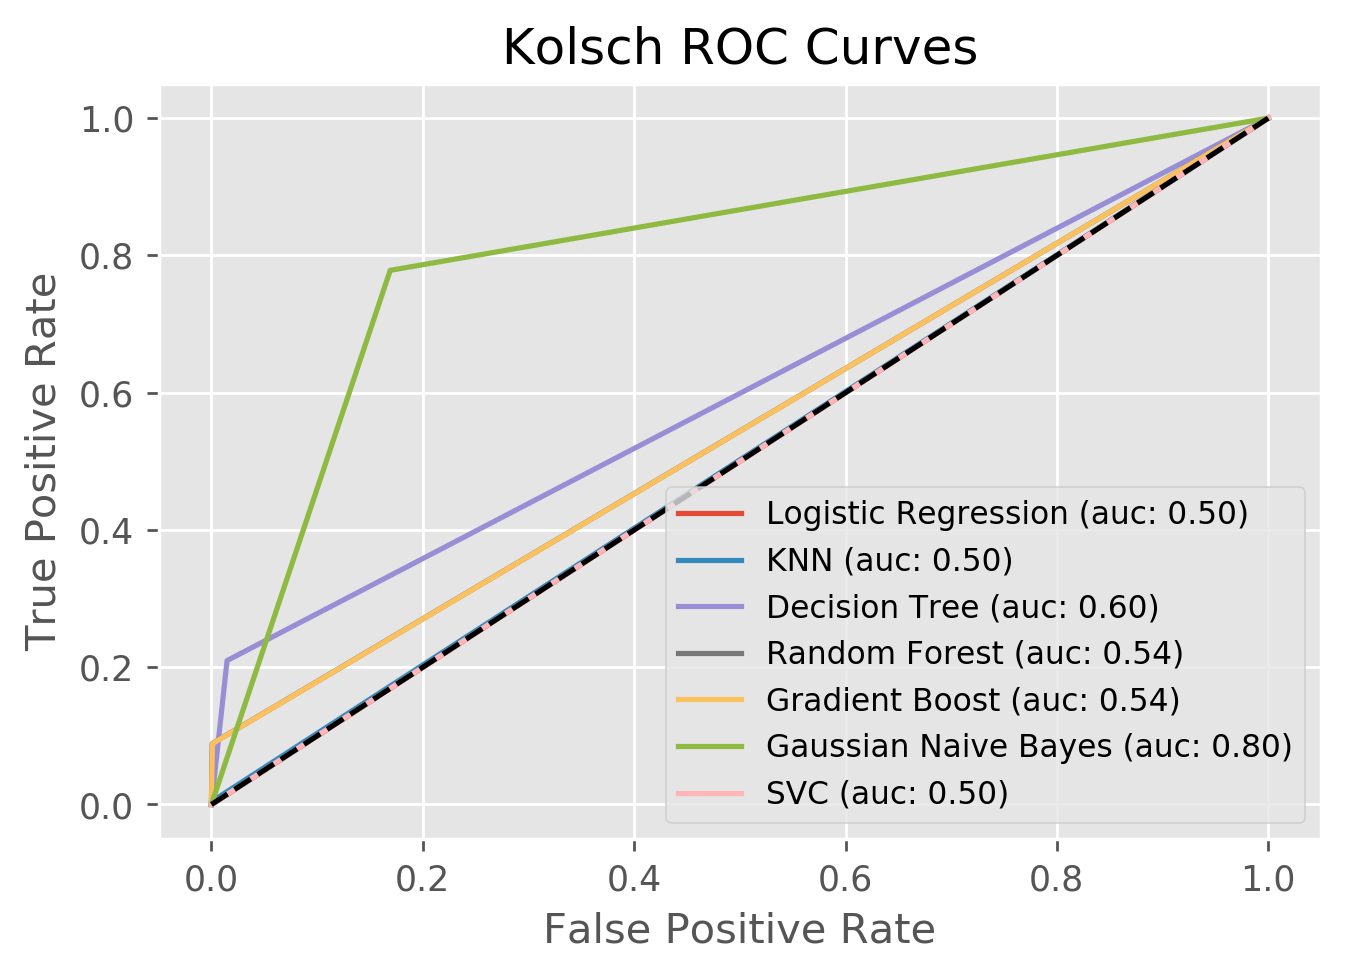

In [96]:
#Kolsch
kolsch_roc_list = []
for model, name in zip(models, model_names):
    model.fit(X_train_kolsch, y_train_kolsch)
    preds = model.predict(X_test_kolsch)
    fpr, tpr, _ = roc_curve(y_test_kolsch, preds)
    auc_score = auc(fpr, tpr)
    kolsch_roc_list.append((name, tpr, fpr, auc_score))

plt.figure(dpi=250)
for name, tpr, fpr, auc_score in kolsch_roc_list:
    plt.plot(fpr, tpr, label=name+' (auc: %.2f)'%auc_score)
plt.legend(loc='lower right', fontsize=9)
plt.plot([0, 1], [0, 1], color='k', linestyle='--');
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Kolsch ROC Curves");

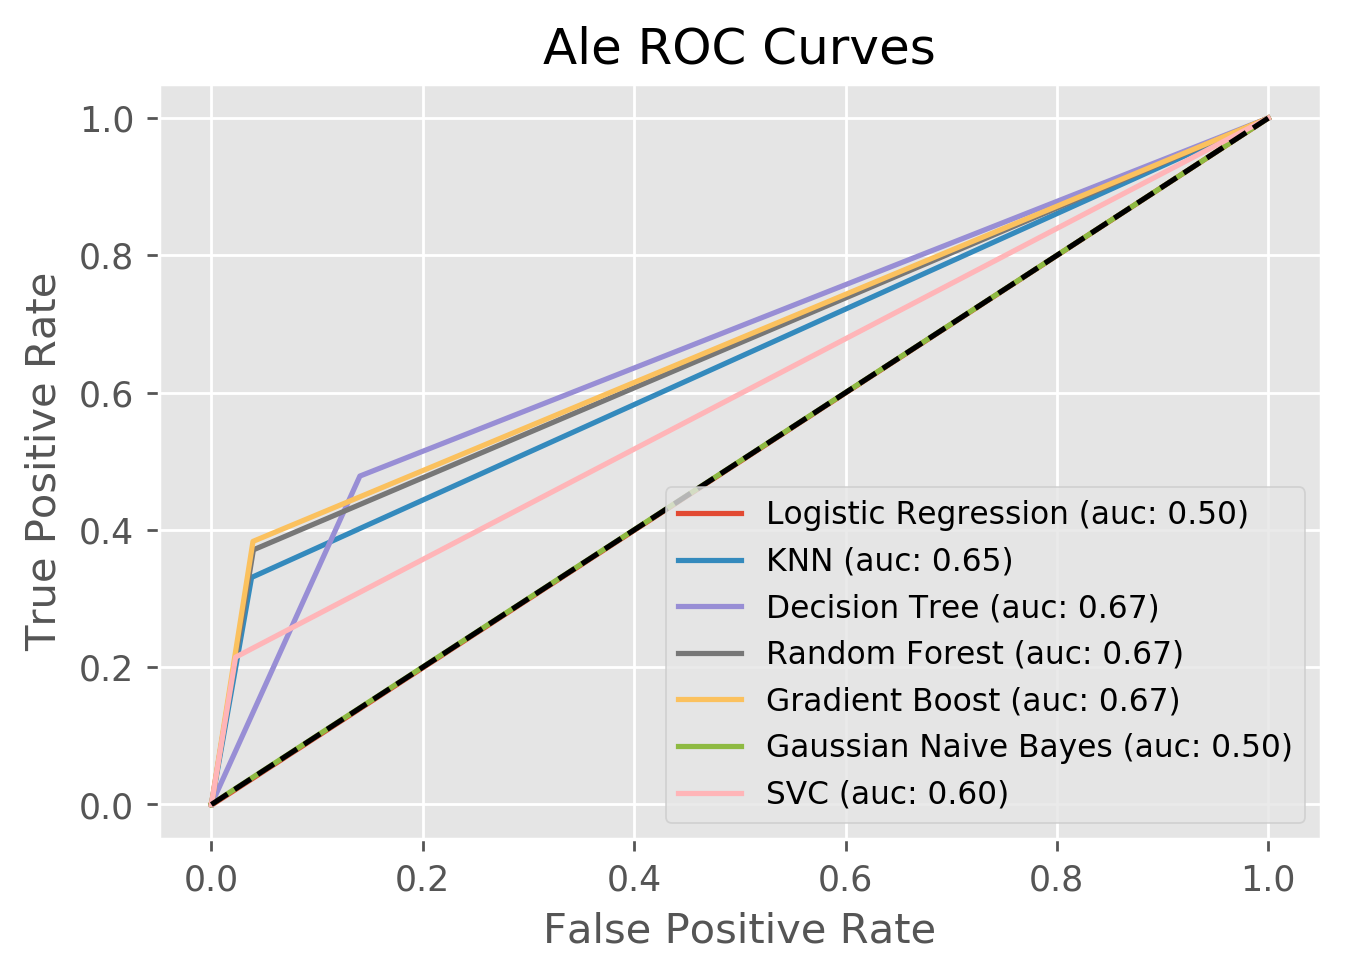

In [97]:
#Ale
ale_roc_list = []
for model, name in zip(models, model_names):
    model.fit(X_train_ale, y_train_ale)
    preds = model.predict(X_test_ale)
    fpr, tpr, _ = roc_curve(y_test_ale, preds)
    auc_score = auc(fpr, tpr)
    ale_roc_list.append((name, tpr, fpr, auc_score))

plt.figure(dpi=250)
for name, tpr, fpr, auc_score in ale_roc_list:
    plt.plot(fpr, tpr, label=name+' (auc: %.2f)'%auc_score)
plt.legend(loc='lower right', fontsize=9)
plt.plot([0, 1], [0, 1], color='k', linestyle='--');
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Ale ROC Curves");

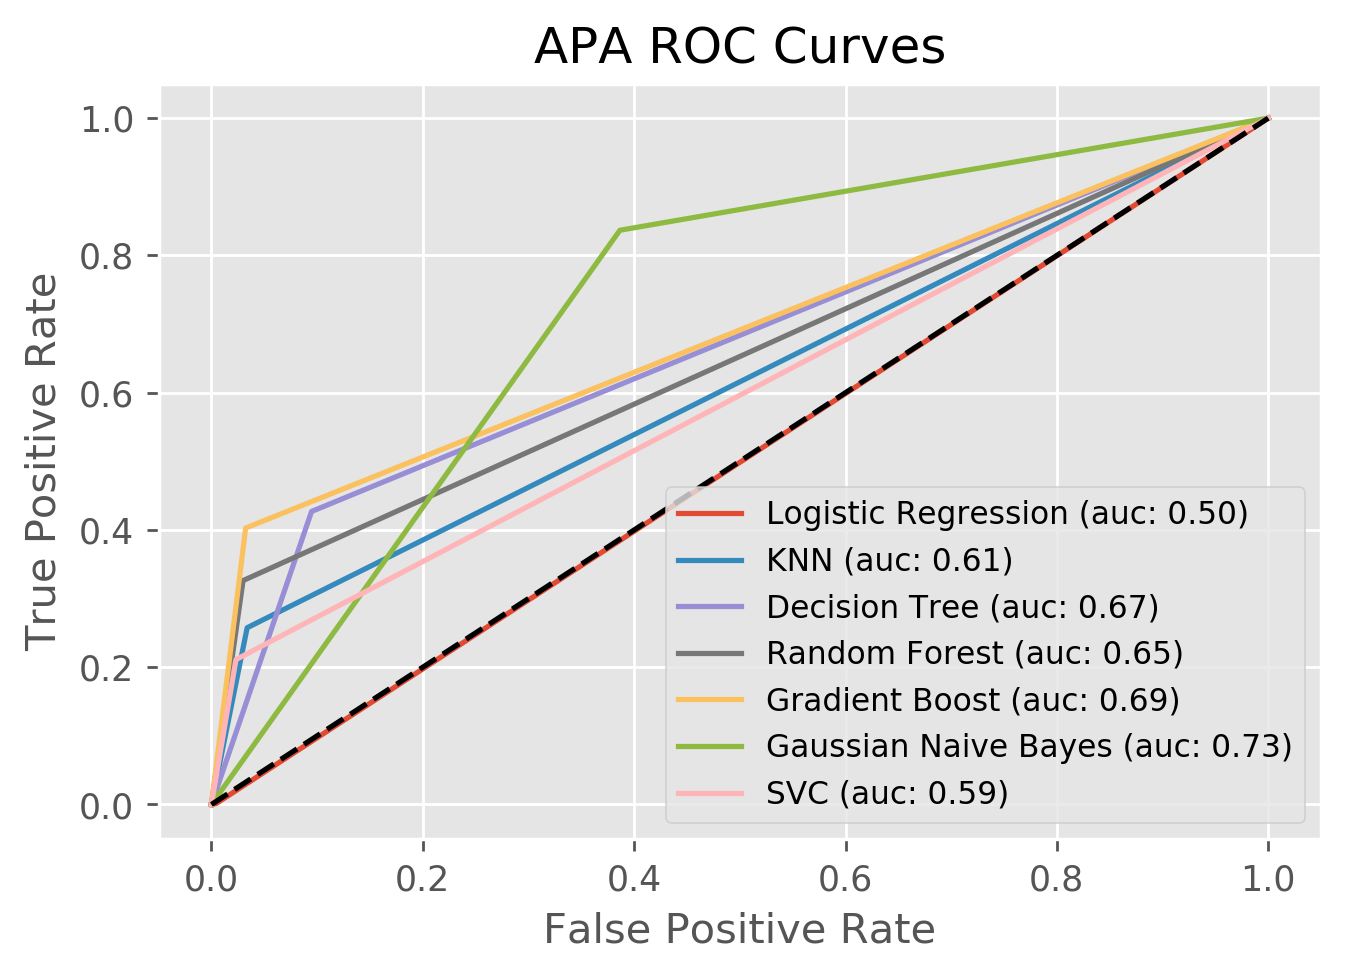

In [98]:
#APA
apa_roc_list = []
for model, name in zip(models, model_names):
    model.fit(X_train_apa, y_train_apa)
    preds = model.predict(X_test_apa)
    fpr, tpr, _ = roc_curve(y_test_apa, preds)
    auc_score = auc(fpr, tpr)
    apa_roc_list.append((name, tpr, fpr, auc_score))

plt.figure(dpi=250)
for name, tpr, fpr, auc_score in apa_roc_list:
    plt.plot(fpr, tpr, label=name+' (auc: %.2f)'%auc_score)
plt.legend(loc='lower right', fontsize=9)
plt.plot([0, 1], [0, 1], color='k', linestyle='--');
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("APA ROC Curves");

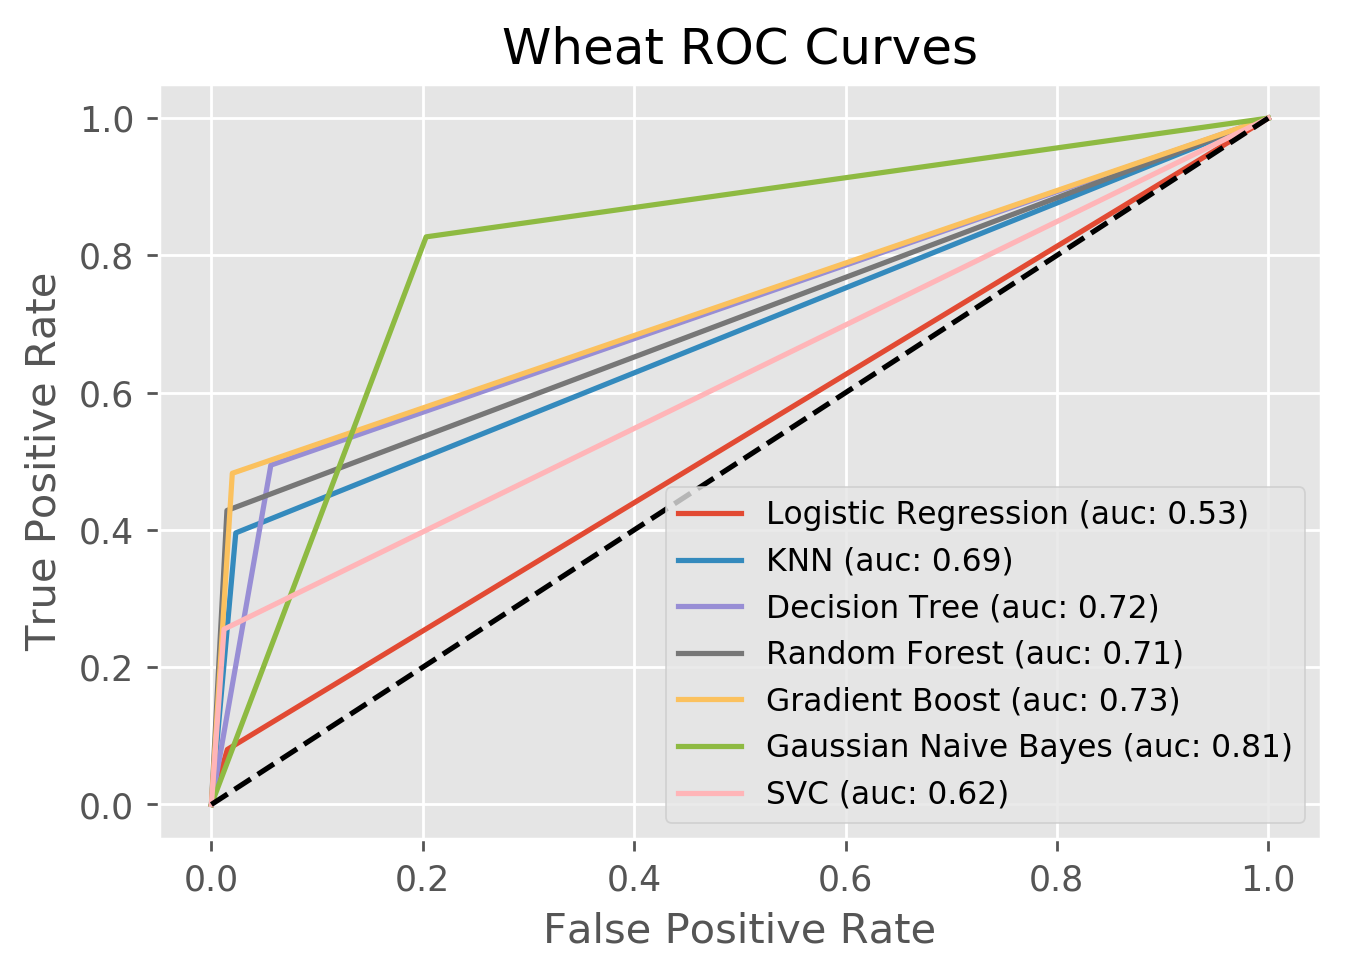

In [99]:
#Wheat
wheat_roc_list = []
for model, name in zip(models, model_names):
    model.fit(X_train_wheat, y_train_wheat)
    preds = model.predict(X_test_wheat)
    fpr, tpr, _ = roc_curve(y_test_wheat, preds)
    auc_score = auc(fpr, tpr)
    wheat_roc_list.append((name, tpr, fpr, auc_score))

plt.figure(dpi=250)
for name, tpr, fpr, auc_score in wheat_roc_list:
    plt.plot(fpr, tpr, label=name+' (auc: %.2f)'%auc_score)
plt.legend(loc='lower right', fontsize=9)
plt.plot([0, 1], [0, 1], color='k', linestyle='--');
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Wheat ROC Curves");

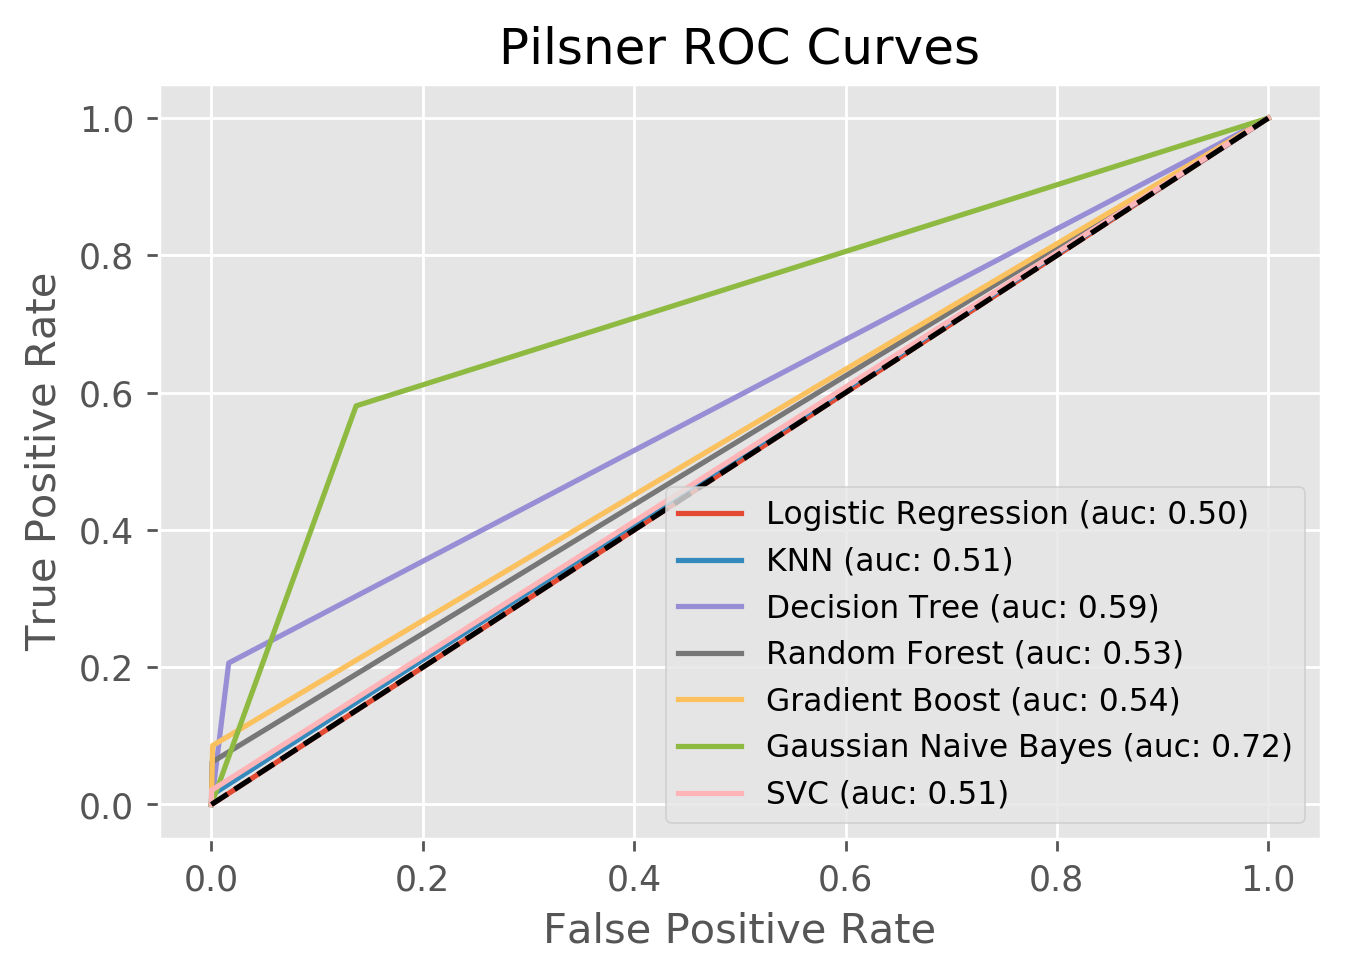

In [100]:
#Pilsner
pilsner_roc_list = []
for model, name in zip(models, model_names):
    model.fit(X_train_pilsner, y_train_pilsner)
    preds = model.predict(X_test_pilsner)
    fpr, tpr, _ = roc_curve(y_test_pilsner, preds)
    auc_score = auc(fpr, tpr)
    pilsner_roc_list.append((name, tpr, fpr, auc_score))

plt.figure(dpi=250)
for name, tpr, fpr, auc_score in pilsner_roc_list:
    plt.plot(fpr, tpr, label=name+' (auc: %.2f)'%auc_score)
plt.legend(loc='lower right', fontsize=9)
plt.plot([0, 1], [0, 1], color='k', linestyle='--');
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Pilsner ROC Curves");